In [2]:
%matplotlib inline
from __future__ import print_function, unicode_literals
import sys, os, glob
import re
import datetime as dt
import seaborn as sns
import json
from collections import OrderedDict

In [3]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap

In [4]:
from pygaarst import raster
sys.path.append("../firedetection/")
import viirstools as vt
import viirsswathtools as vst
import viirsifire as vif

In [5]:
reload(vif)
reload(vst)

<module 'viirsswathtools' from '../firedetection/viirsswathtools.pyc'>

In [6]:
import fiona.crs
from shapely.geometry import Polygon, Point, LineString
import shapely.wkt
import pandas as pd
import geopandas as gp

In [7]:
ALT1 = True
ALT2 = False 

basedir = '/Volumes/cwdata1/VIIRS/GINA/dds.gina.alaska.edu/NPP/viirs/'
outdir = '/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/rasterout/'
if ALT1:
    basedir = '/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/'
elif ALT2:
    basedir = '/Volumes/SCIENCE/Fire/DATA_BY_AREA/2015/VIIRS/'

if os.path.isdir(basedir):
    print(basedir, "exists")
else:
    print("Please check directory {}: cannot access it.".format(basedir))

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/ exists


In [8]:
granulecatalogfn = 'viirsgranulecatalog_in_ROI.json'

In [9]:
sockeye_lon, sockeye_lat = (-150.08544, 61.84486)
sample_lon, sample_lat = sockeye_lon, sockeye_lat
sampleloc = Point(sample_lon, sample_lat)

In [10]:
with open(os.path.join(basedir, granulecatalogfn), 'rU') as src:
    granuledir = json.load(src)

In [52]:
crs = fiona.crs.from_epsg('4326')
granuleDF = pd.DataFrame.from_dict(granuledir, orient='index')
granuleDF = granuleDF.loc[granuleDF['iband_complete']]
granuleDF['geometry'] = granuleDF['edgepolygon_I'].apply(shapely.wkt.loads)

granuleDF = gp.GeoDataFrame(
    granuleDF, 
    crs=crs,
    geometry=granuleDF.geometry)
granuleDF = granuleDF.loc[granuleDF['geometry'].contains(sampleloc), :]
print(granuleDF.shape)
granuleDF

(70, 36)


,GITCO,edgepolygon_I,GMTCO,mband_complete,ascending_node,borealoverlap,SVM16,SVM14,SVM15,SVM12,...,SVM06,SVM01,SVM03,SVM02,granuleID,SVM09,SVM08,SVDNB,dir,geometry
20150527_2045150,GITCO_npp_d20150527_t2045150_e2046392_b18550_c...,POLYGON ((-94.47161865234375 64.99661254882812...,GMTCO_npp_d20150527_t2045150_e2046392_b18550_c...,True,True,0.358324,SVM16_npp_d20150527_t2045150_e2046392_b18550_c...,SVM14_npp_d20150527_t2045150_e2046392_b18550_c...,SVM15_npp_d20150527_t2045150_e2046392_b18550_c...,SVM12_npp_d20150527_t2045150_e2046392_b18550_c...,...,SVM06_npp_d20150527_t2045150_e2046392_b18550_c...,SVM01_npp_d20150527_t2045150_e2046392_b18550_c...,SVM03_npp_d20150527_t2045150_e2046392_b18550_c...,SVM02_npp_d20150527_t2045150_e2046392_b18550_c...,NPP001134315156,SVM09_npp_d20150527_t2045150_e2046392_b18550_c...,SVM08_npp_d20150527_t2045150_e2046392_b18550_c...,SVDNB_npp_d20150527_t2045150_e2046392_b18550_c...,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,POLYGON ((-94.47161865234375 64.99661254882812...
20150527_2224498,GITCO_npp_d20150527_t2224498_e2226140_b18551_c...,POLYGON ((-121.3077774047852 58.46441268920898...,GMTCO_npp_d20150527_t2224498_e2226140_b18551_c...,True,True,0.352706,SVM16_npp_d20150527_t2224498_e2226140_b18551_c...,SVM14_npp_d20150527_t2224498_e2226140_b18551_c...,SVM15_npp_d20150527_t2224498_e2226140_b18551_c...,SVM12_npp_d20150527_t2224498_e2226140_b18551_c...,...,SVM06_npp_d20150527_t2224498_e2226140_b18551_c...,SVM01_npp_d20150527_t2224498_e2226140_b18551_c...,SVM03_npp_d20150527_t2224498_e2226140_b18551_c...,SVM02_npp_d20150527_t2224498_e2226140_b18551_c...,NPP001134374901,SVM09_npp_d20150527_t2224498_e2226140_b18551_c...,SVM08_npp_d20150527_t2224498_e2226140_b18551_c...,SVDNB_npp_d20150527_t2224498_e2226140_b18551_c...,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,POLYGON ((-121.3077774047852 58.46441268920898...
20150527_2227406,GITCO_npp_d20150527_t2227406_e2229048_b18551_c...,POLYGON ((-118.6018524169922 68.13177490234375...,GMTCO_npp_d20150527_t2227406_e2229048_b18551_c...,True,True,0.135385,SVM16_npp_d20150527_t2227406_e2229048_b18551_c...,SVM14_npp_d20150527_t2227406_e2229048_b18551_c...,SVM15_npp_d20150527_t2227406_e2229048_b18551_c...,SVM12_npp_d20150527_t2227406_e2229048_b18551_c...,...,SVM06_npp_d20150527_t2227406_e2229048_b18551_c...,SVM01_npp_d20150527_t2227406_e2229048_b18551_c...,SVM03_npp_d20150527_t2227406_e2229048_b18551_c...,SVM02_npp_d20150527_t2227406_e2229048_b18551_c...,NPP001134376608,SVM09_npp_d20150527_t2227406_e2229048_b18551_c...,SVM08_npp_d20150527_t2227406_e2229048_b18551_c...,SVDNB_npp_d20150527_t2227406_e2229048_b18551_c...,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,POLYGON ((-118.6018524169922 68.13177490234375...
20150528_2026193,GITCO_npp_d20150528_t2026193_e2027435_b18565_c...,POLYGON ((-89.60297393798828 65.35804748535156...,GMTCO_npp_d20150528_t2026193_e2027435_b18565_c...,True,True,0.267876,SVM16_npp_d20150528_t2026193_e2027435_b18565_c...,SVM14_npp_d20150528_t2026193_e2027435_b18565_c...,SVM15_npp_d20150528_t2026193_e2027435_b18565_c...,SVM12_npp_d20150528_t2026193_e2027435_b18565_c...,...,SVM06_npp_d20150528_t2026193_e2027435_b18565_c...,SVM01_npp_d20150528_t2026193_e2027435_b18565_c...,SVM03_npp_d20150528_t2026193_e2027435_b18565_c...,SVM02_npp_d20150528_t2026193_e2027435_b18565_c...,NPP001135167802,SVM09_npp_d20150528_t2026193_e2027435_b18565_c...,SVM08_npp_d20150528_t2026193_e2027435_b18565_c...,SVDNB_npp_d20150528_t2026193_e2027435_b18565_c...,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,POLYGON ((-89.60297393798828 65.35804748535156...
20150528_2207195,GITCO_npp_d20150528_t2207195_e2208437_b18566_c...,POLYGON ((-115.5025863647461 63.68019104003906...,GMTCO_npp_d20150528_t2207195_e2208437_b18566_c...,True,True,0.523199,SVM16_npp_d20150528_t2207195_e2208437_b18566_c...,SVM14_npp_d20150528_t2207195_e2208437_b18566_c...,SVM15_npp_d20150528_t2207195_e2208437_b18566_c...,SVM12_npp_d20150528_t2207195_e2208437_b18566_c...,...,SVM06_npp_d20150528_t2

In [12]:
idx = granuleDF.index

In [53]:
startdate = '20150614'
enddate = '20150617'
granules = [idx for idx in granuleDF.index if idx > startdate and idx < enddate]
granuleDF = granuleDF.loc[granules]


In [59]:
granuleDF[[u'orbitnumber', u'granuleID']]

,orbitnumber,granuleID
20150614_1154031,18800,NPP001149548424
20150614_1333361,18801,NPP001149608169
20150614_1335015,18801,NPP001149609022
20150614_2007390,18805,NPP001149844588
20150614_2147138,18806,NPP001149904333
20150614_2328122,18807,NPP001149964932
20150614_2329376,18807,NPP001149965785
20150615_1135074,18814,NPP001150401070
20150615_2128181,18820,NPP001150756980
20150615_2129435,18820,NPP001150757833


In [15]:
gisbasedir = "/Volumes/SCIENCE_mobile_Mac/GENERAL_GIS/"
productdir = "/Users/chris/Dropbox/Research/PhD/2015VIRSPaper/Sockeye_img/"

In [16]:
railroads = os.path.join(gisbasedir, "matsugov.us/rr/railroad_latlon")
primaryroads = os.path.join(gisbasedir, "catalog.data.gov/tl_2013_02_prisecroads/tl_2013_02_prisecroads")
sideroads = os.path.join(gisbasedir, "matsugov.us/rds/rds_latlon")

In [17]:
earth='cornsilk'
water='lightskyblue'

In [18]:
sns.set(rc={'image.cmap': 'gist_heat'})
#sns.set(rc={'image.cmap': 'magma'})
sns.set_context("poster")

myfontsize = 20
font = {'family' : 'Calibri',
        'weight': 'bold',
        'size'   : myfontsize}
matplotlib.rc('font', **font)
matplotlib.axes.rcParams['axes.labelsize']=myfontsize-4
matplotlib.axes.rcParams['axes.titlesize']=myfontsize
cmap1 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'canary yellow']))
cmap2 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'purplish blue']))
cbarfraction = 0.05
cbarpad = 0.05


## Plots -- looping

In [38]:
cmap1 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'canary yellow']))
cmap2 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'purplish blue']))
cmap3 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'kelly green']))
cmap4 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'turquoise']))

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_14_165_1148/sdr
518 619 1969 2070
True


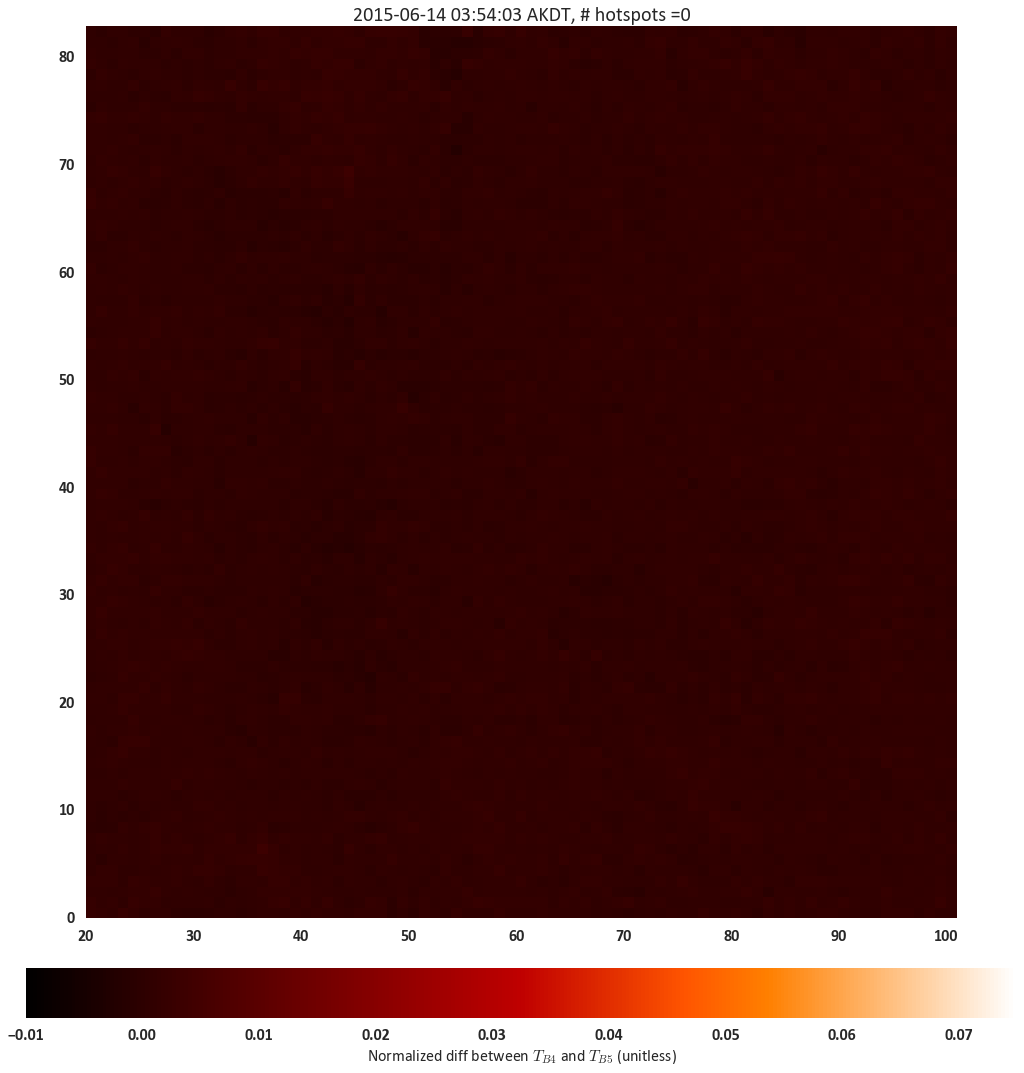

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_14_165_1329/sdr
1347 1448 4720 4821
False


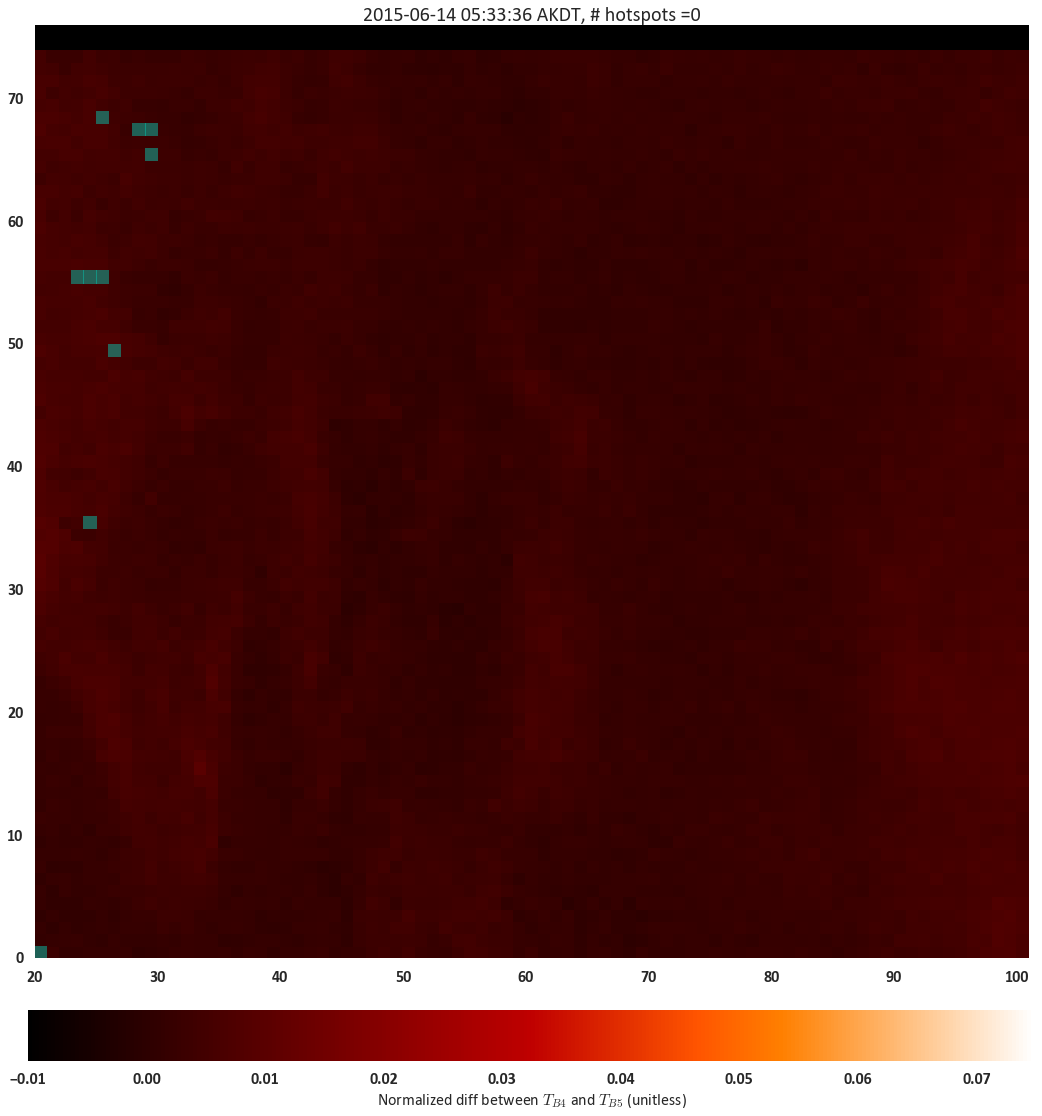

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_14_165_1329/sdr
0 51 4751 4852
False


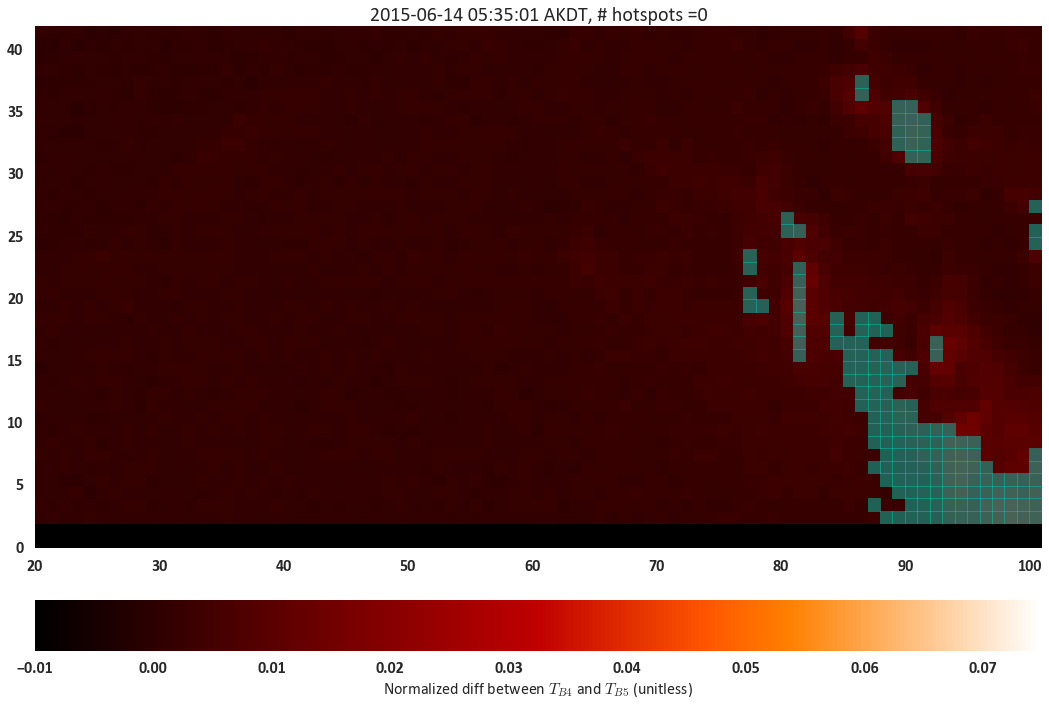

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_14_165_2005/sdr
1411 1512 6234 6335
False


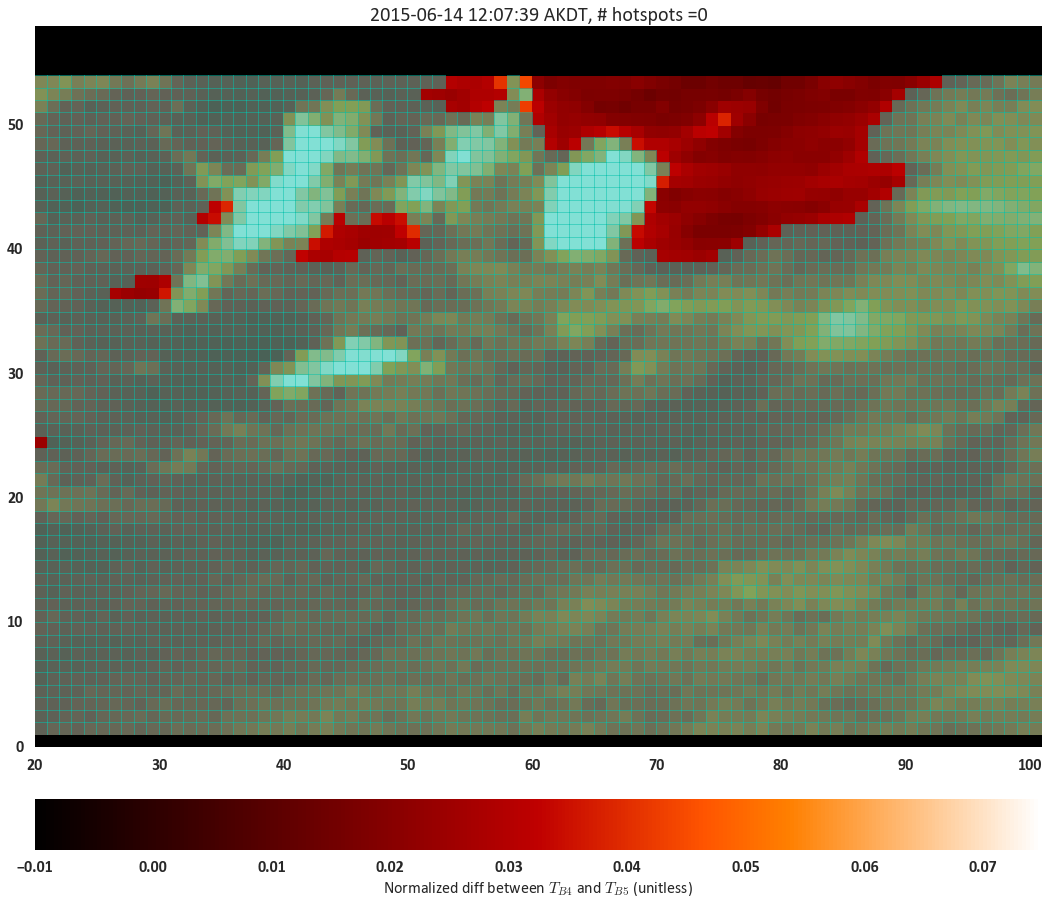

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_14_165_2144/sdr
1280 1381 4152 4253
False


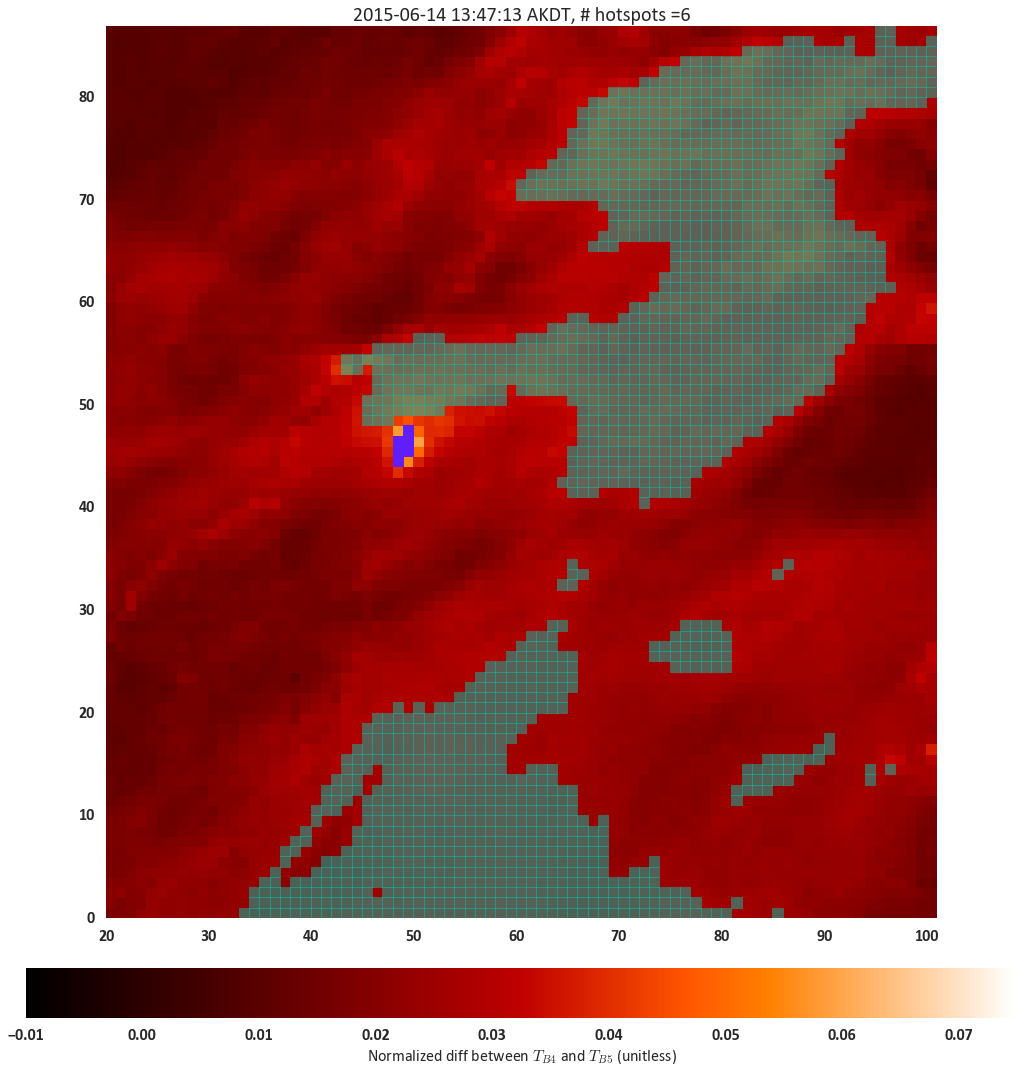

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_14_165_2325/sdr
897 998 1323 1424
False


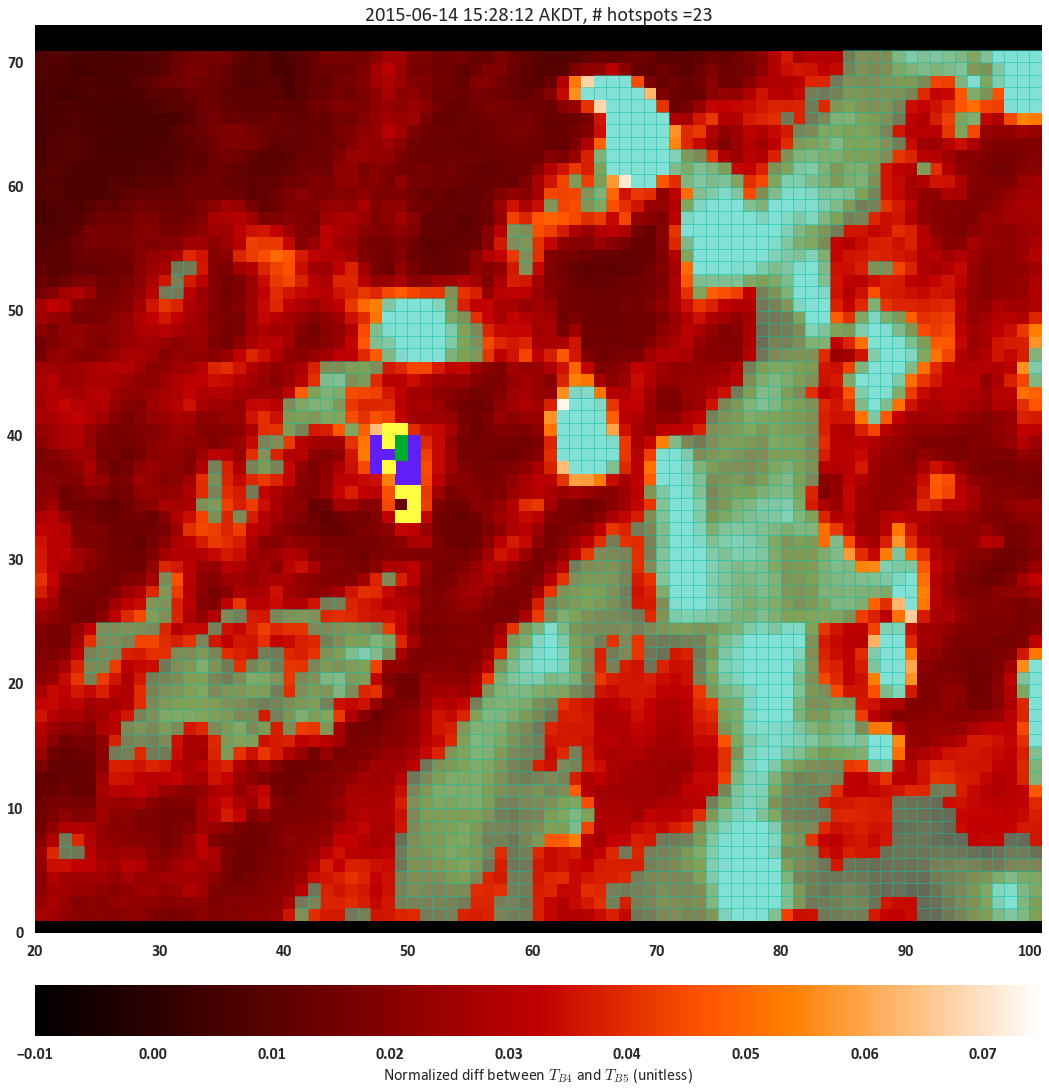

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_14_165_2325/sdr
0 51 1295 1396
False


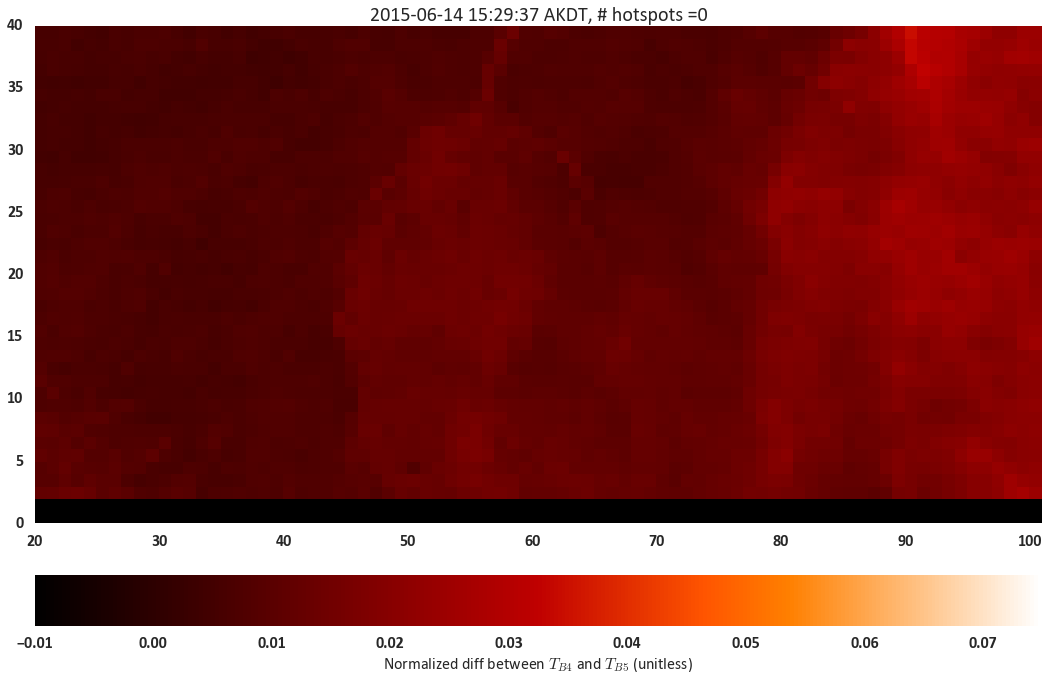

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_15_166_1130/sdr
486 587 1432 1533
True


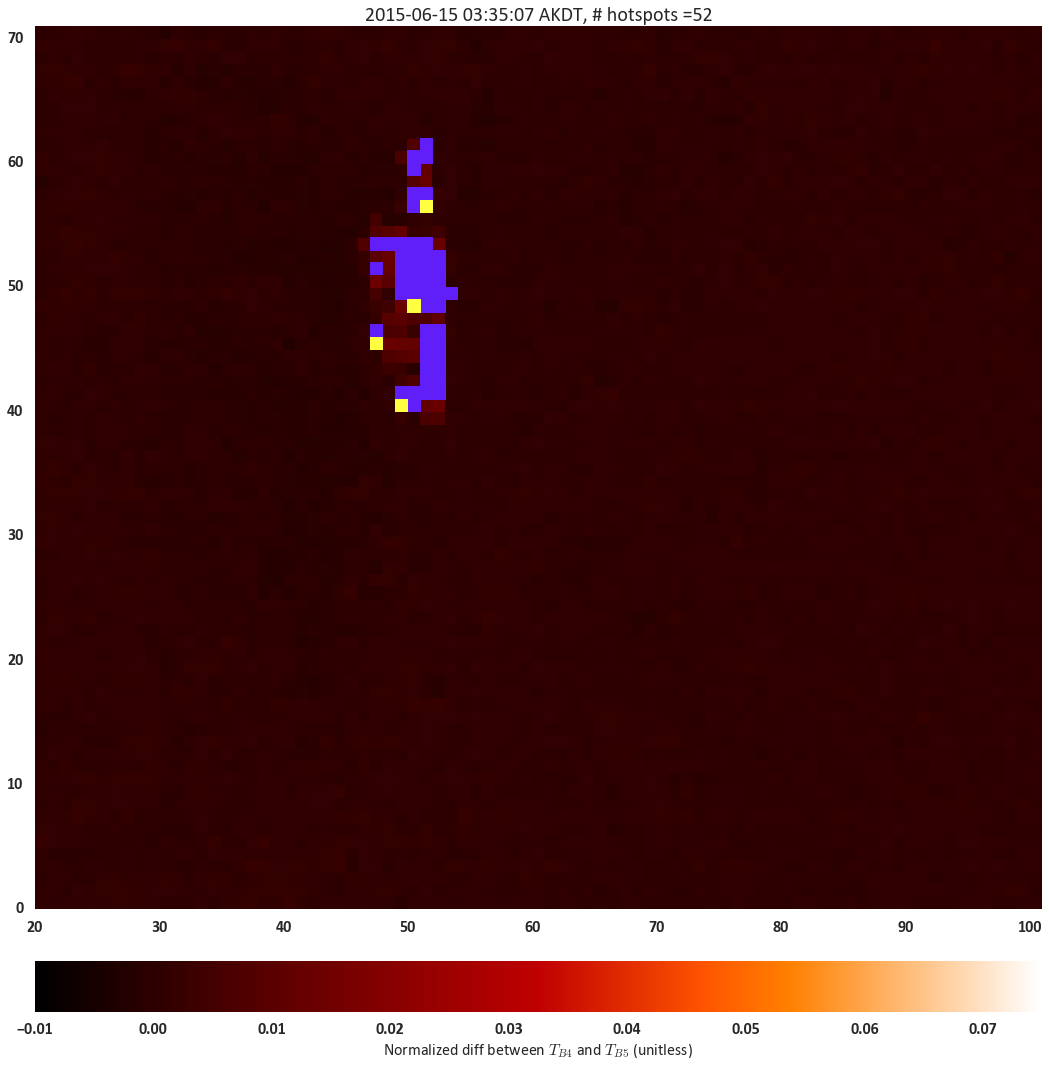

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_15_166_2125/sdr
1480 1536 4610 4711
False


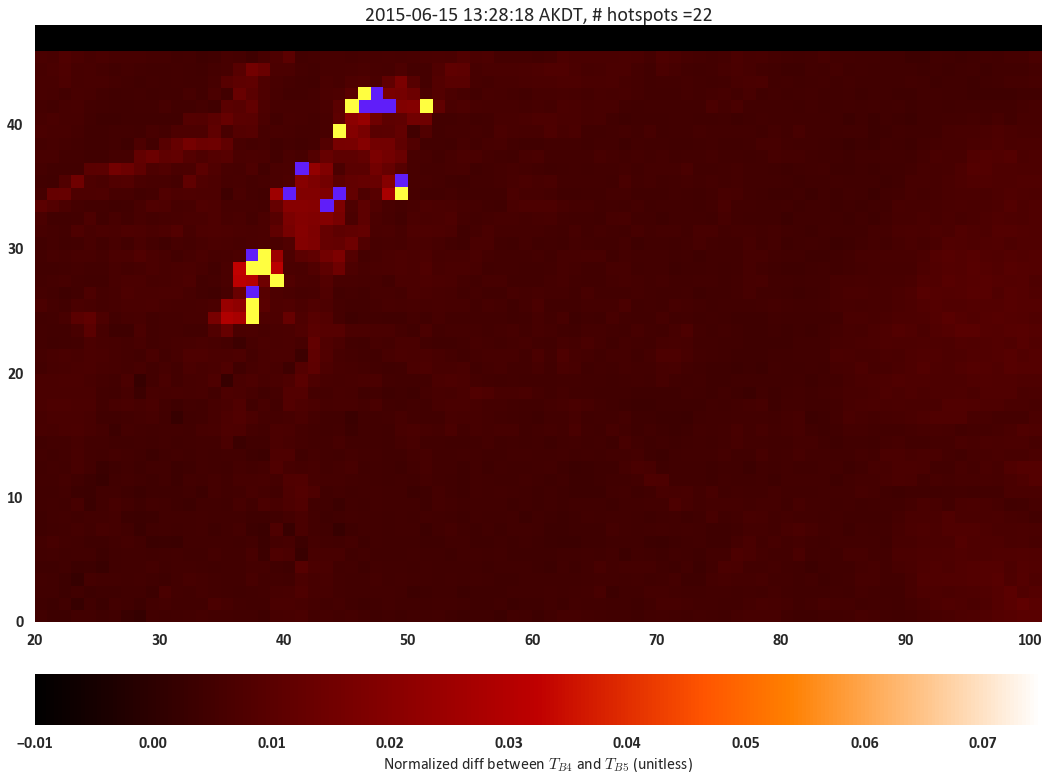

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_15_166_2125/sdr
0 52 4609 4710
False


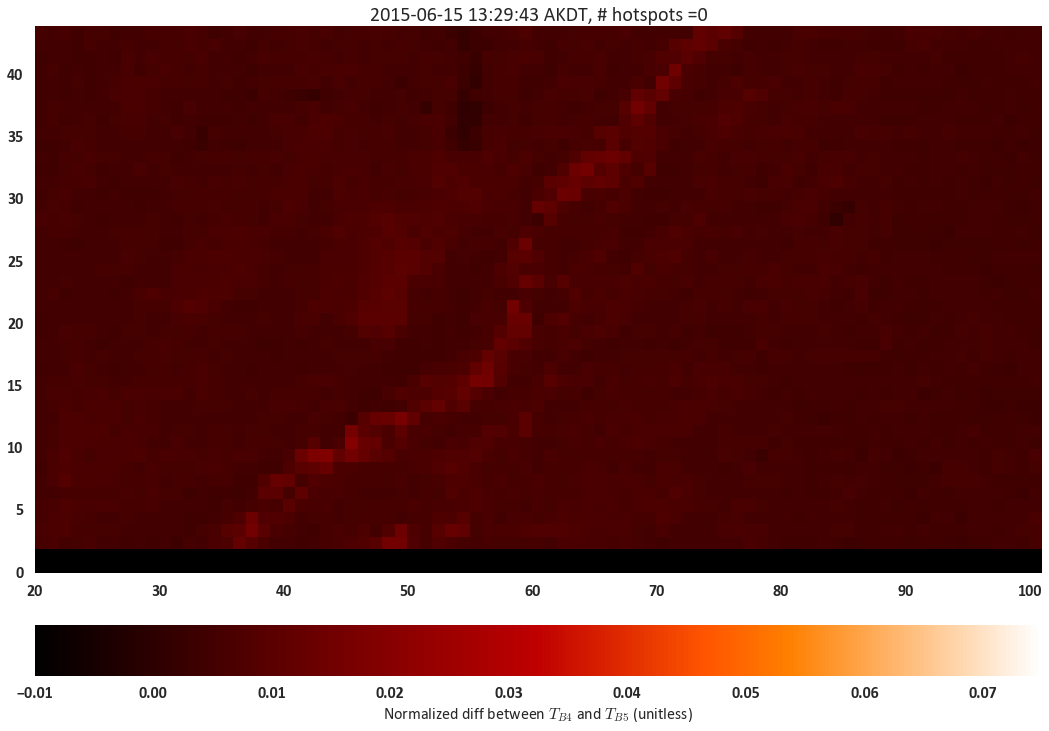

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_15_166_2306/sdr
824 925 1818 1919
False


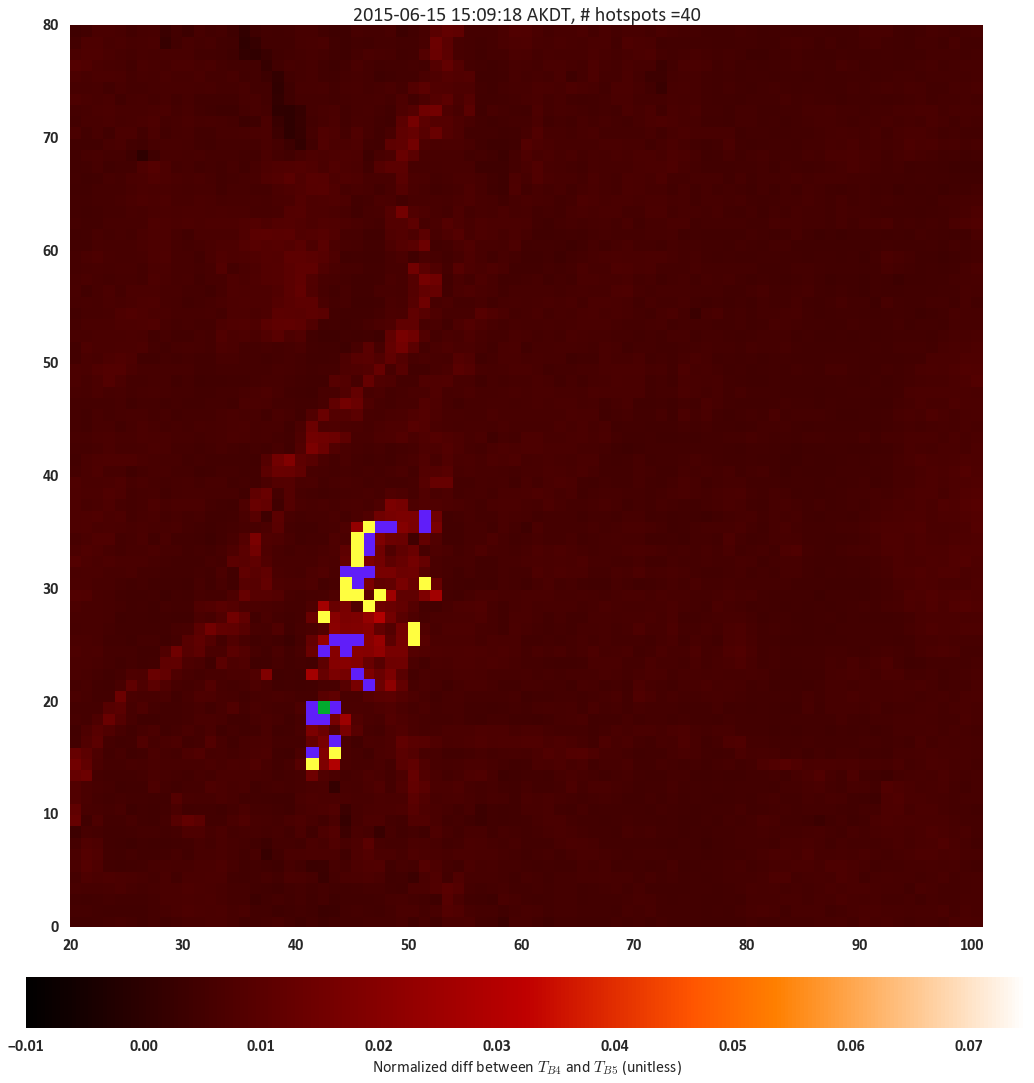

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_15_166_2306/sdr
0 51 1754 1855
False


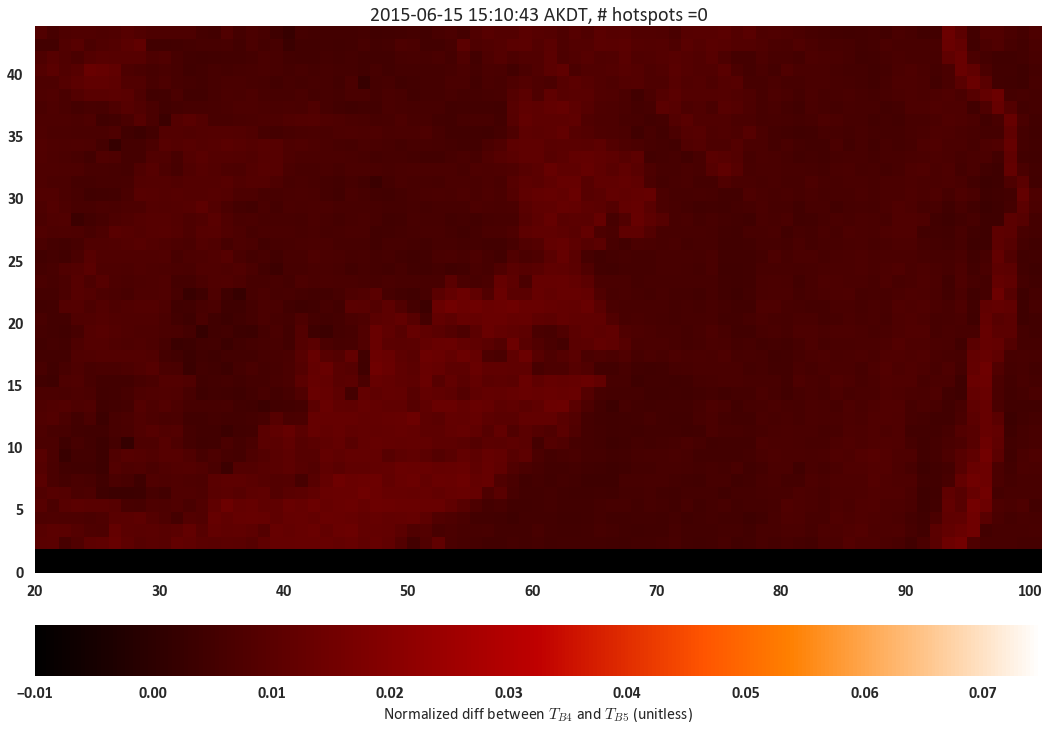

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_16_167_1111/sdr
411 512 874 975
True


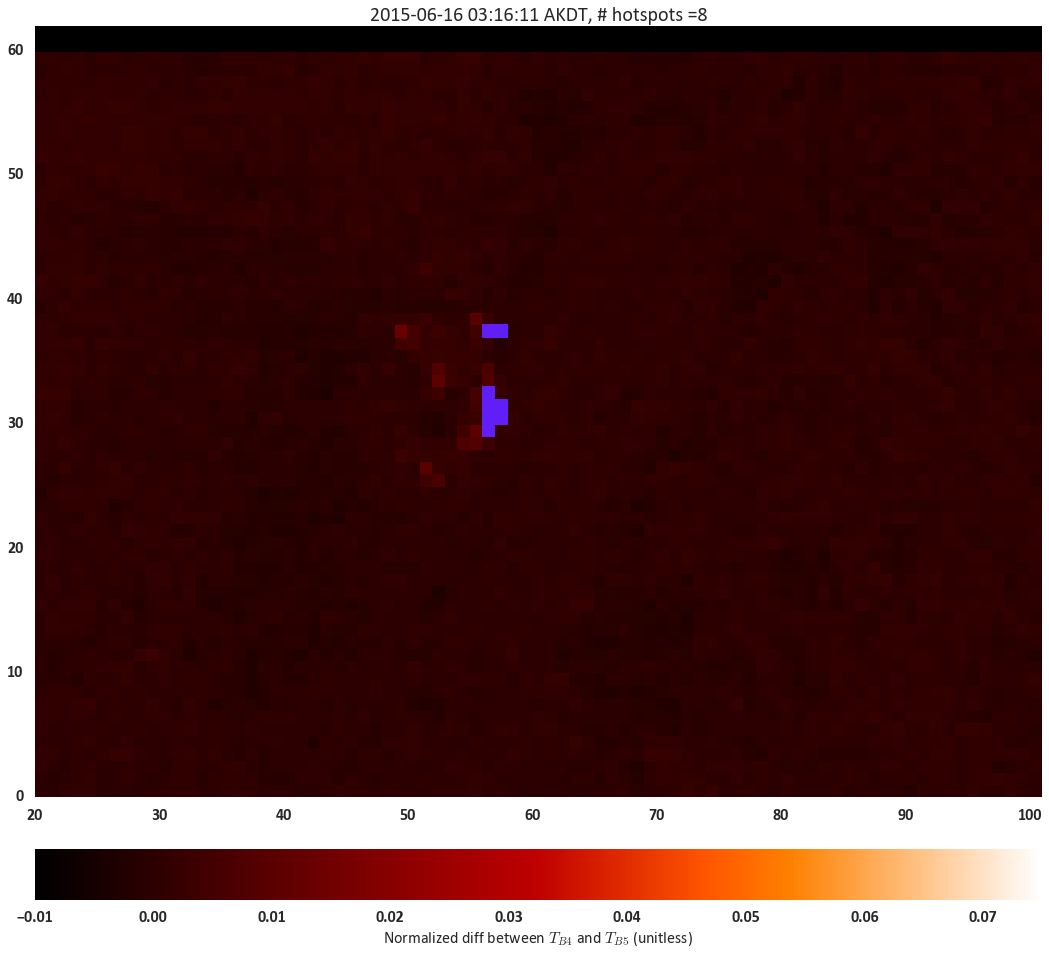

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_16_167_2107/sdr
191 292 5001 5102
False


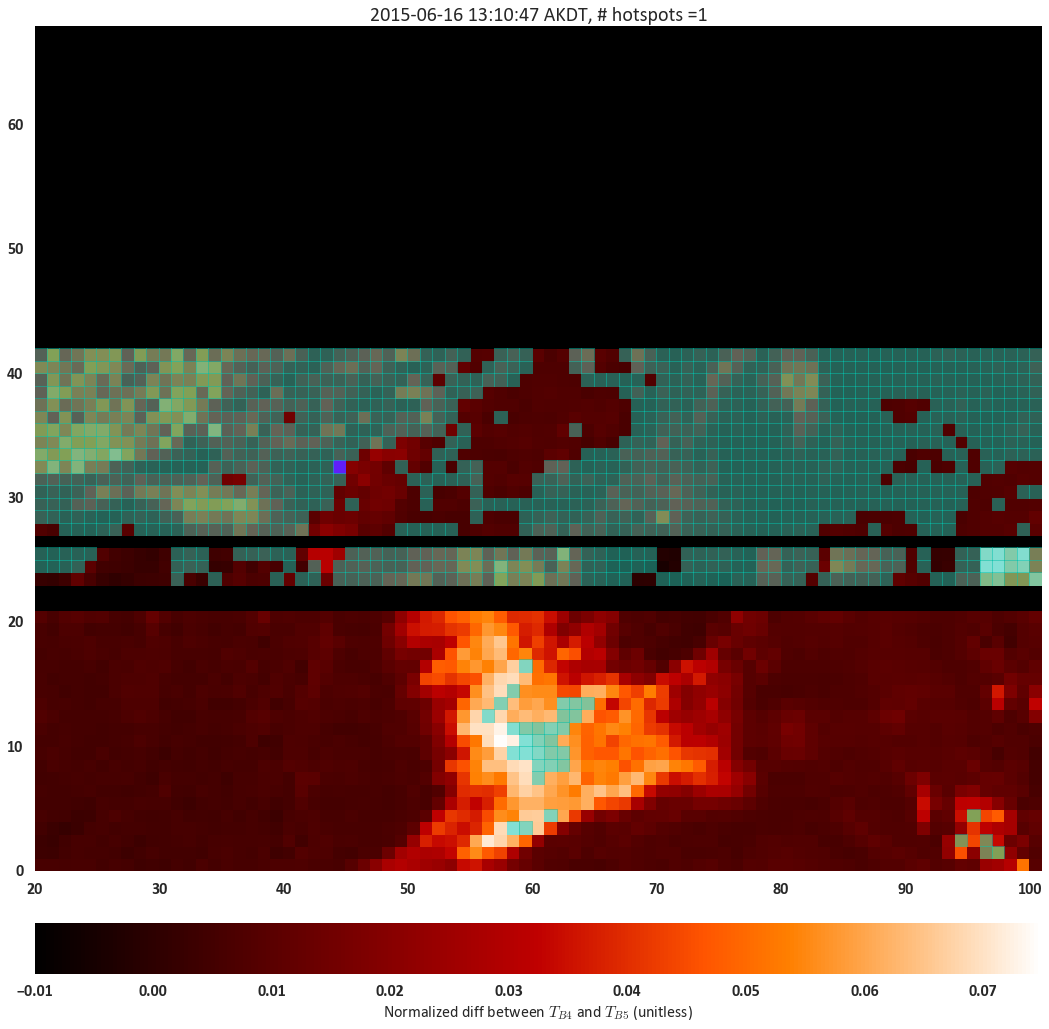

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_16_167_2247/sdr
826 927 2319 2420
False


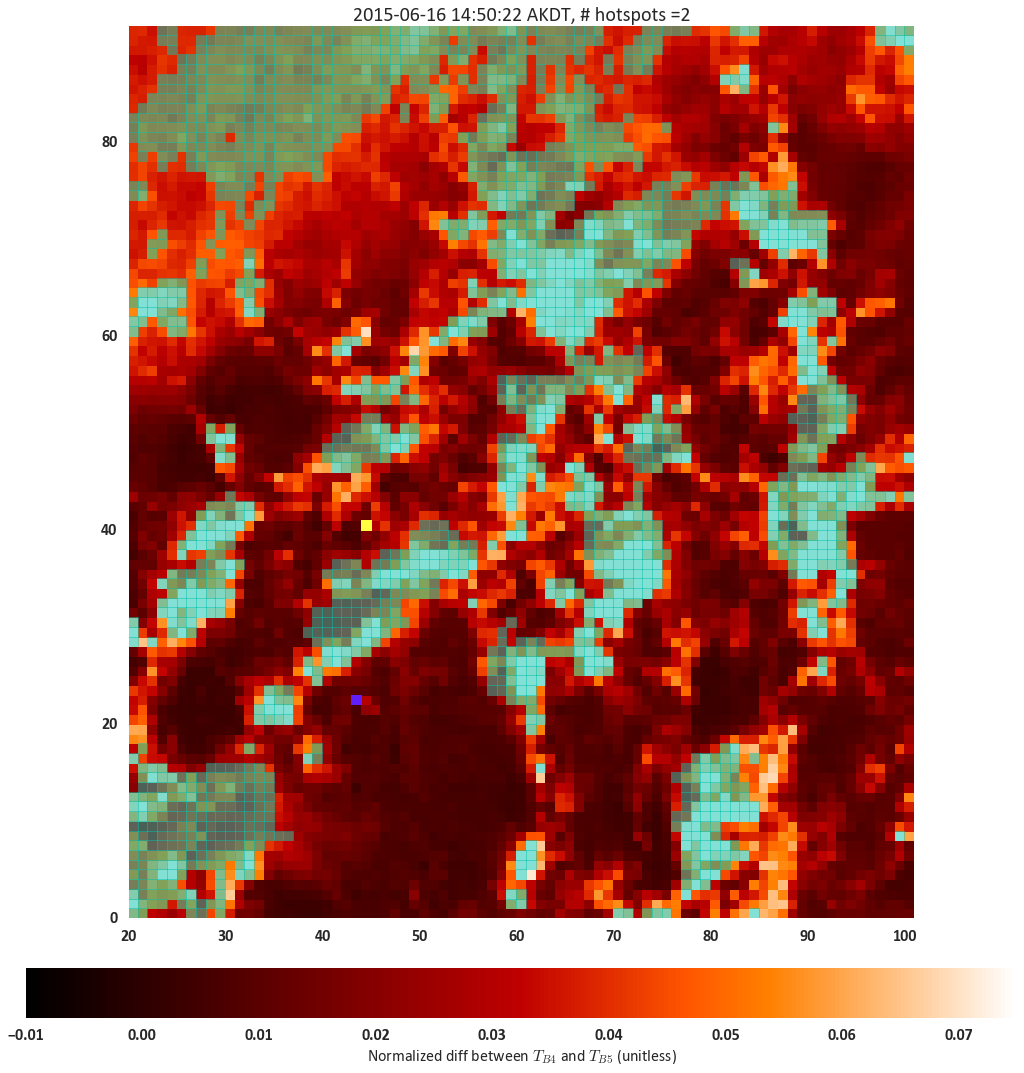

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_16_167_2247/sdr
0 51 2241 2342
False


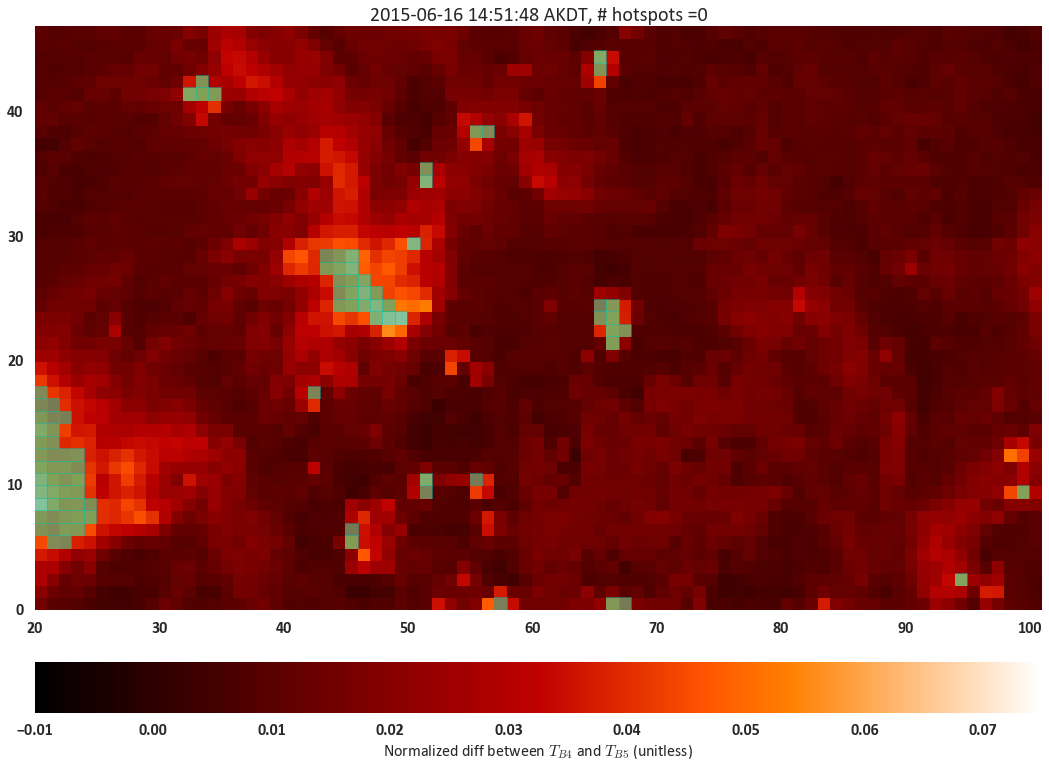

In [27]:
for idx, granule in granuleDF.iterrows():
    print(granule['dir'])
    testscene01 = raster.VIIRSHDF5(os.path.join(granule['dir'], granule['SVI01']))
    testscene02 = raster.VIIRSHDF5(os.path.join(granule['dir'], granule['SVI02']))
    testscene03 = raster.VIIRSHDF5(os.path.join(granule['dir'], granule['SVI03']))
    testscene04 = raster.VIIRSHDF5(os.path.join(granule['dir'], granule['SVI04']))
    testscene05 = raster.VIIRSHDF5(os.path.join(granule['dir'], granule['SVI05']))
    imin, imax, jmin, jmax = testscene04.crop(sample_lat, sample_lon, 50, 50)
    print(imin, imax, jmin, jmax)

    skips = vst.get_skips(testscene04, imin, imax, jmin, jmax)
    skiprows = vst.get_badrows(skips)

    pixq4 = testscene04.pixelquality[imin:imax, jmin:jmax]
    pixq5 = testscene05.pixelquality[imin:imax, jmin:jmax]

    datestamp = vt.getdatestamp_AKDT(testscene04)
    
    bandname = testscene04.bandname
    testdat = testscene04.dataobj['All_Data'][bandname]['BrightnessTemperature'][imin:imax, jmin:jmax]
    mult, add = testscene04.dataobj['All_Data'][bandname]['BrightnessTemperatureFactors'][:]
    plotraster4 = testdat*mult + add
    bandname = testscene05.bandname
    testdat = testscene05.dataobj['All_Data'][bandname]['BrightnessTemperature'][imin:imax, jmin:jmax]
    mult, add = testscene05.dataobj['All_Data'][bandname]['BrightnessTemperatureFactors'][:]
    plotraster5 = testdat*mult + add
    plotraster45 =  (plotraster4 - plotraster5) / (plotraster4 + plotraster5)
    bandname = testscene01.bandname
    testdat = testscene01.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
    mult, add = testscene01.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
    plotraster1 = testdat*mult + add
    bandname = testscene02.bandname
    testdat = testscene02.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
    mult, add = testscene02.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
    plotraster2 = testdat*mult + add

    nightscene = True
    solzenithangles = testscene04.geodata['SolarZenithAngle'][imin:imax, jmin:jmax]
    if np.all(solzenithangles <= 90.):
        nightscene = False
    print(nightscene)

    duplicatecondition = (skips == 1.)

    if nightscene:
        cloudcondition = np.logical_and(
            plotraster4 < 295, plotraster5 < 265)
        anomalouscondition, hotcondition, warmcondition = vif.getfireconditions_fromrasters(
            plotraster4, plotraster5, pixq4, pixq5, daytime=False)
    else:
        cloudcondition = np.logical_or(
            plotraster5 < 265, 
            np.logical_and(plotraster1 + plotraster2 > 0.9, plotraster5 < 295))
        cloudcondition = np.logical_or(
            cloudcondition,
            np.logical_and(plotraster1 + plotraster2 > 0.7, plotraster5 < 285))
        anomalouscondition, hotcondition, warmcondition = vif.getfireconditions_fromrasters(
            plotraster4, plotraster5, pixq4, pixq5, daytime=True)
        
    anomalouscondition = np.logical_and(anomalouscondition, ~duplicatecondition)
    anomalouscondition = np.delete(anomalouscondition, skiprows, 0)
    hotcondition = np.logical_and(hotcondition, ~duplicatecondition)
    hotcondition = np.delete(hotcondition, skiprows, 0)
    warmcondition = np.logical_and(warmcondition, ~duplicatecondition)
    warmcondition = np.delete(warmcondition, skiprows, 0)
    cloudcondition = np.delete(cloudcondition, skiprows, 0)

    plotraster45 = np.delete(plotraster45, skiprows, 0)
    plotraster45_masked = np.ma.masked_where(
        ~hotcondition, np.ones(plotraster45.shape))  
    plotraster_cool = np.ma.masked_where(
        ~warmcondition, np.ones(plotraster45.shape))
    plotraster45_anomalousmasked = np.ma.masked_where(
        ~anomalouscondition, np.ones(plotraster45.shape))
    cloudmask = np.ma.masked_where(
        ~cloudcondition, np.ones(plotraster45.shape))
    
    numdetections = anomalouscondition.sum() + hotcondition.sum() + warmcondition.sum()
    plottitle = '{}, # hotspots ={}'.format(
        datestamp, numdetections)

    fig1 = plt.figure(1, figsize=(15, 15))
    ax1 = fig1.add_subplot(111)
    #ax1.set_xticklabels([])
    #ax1.set_yticklabels([])
    ax1.grid(False)

    dataplot = ax1.pcolormesh(np.fliplr(plotraster45), vmin=-.01, vmax=0.075)   
    dataplot3 = ax1.pcolormesh(np.fliplr(plotraster_cool), cmap=cmap2, vmin=0, vmax=1)
    dataplot2 = ax1.pcolormesh(np.fliplr(plotraster45_masked), cmap=cmap1, vmin=0, vmax=1)
    dataplot4 = ax1.pcolormesh(np.fliplr(plotraster45_anomalousmasked), cmap=cmap3, vmin=0, vmax=1)
    cloudplot = ax1.pcolormesh(np.fliplr(cloudmask), cmap=cmap4, alpha=0.5, vmin=0, vmax=1)

    ax1.set_title(plottitle)
    ax1.set_aspect('equal')
    ax1.set_xlim(20, plotraster45.shape[1])
    ax1.set_ylim(0, plotraster45.shape[0])
    plt.tight_layout()

    cbarlabel = "Normalized diff between $T_{B4}$ and $T_{B5}$ (unitless)"
    cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
    cbar.set_label(cbarlabel)

    plt.show()

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_14_165_1148/sdr
518 619 1969 2070
True
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_14_165_1329/sdr
1347 1448 4720 4821
False
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_14_165_1329/sdr
0 51 4751 4852
False
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_14_165_2005/sdr
1411 1512 6234 6335
False
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_14_165_2144/sdr
1280 1381 4152 4253
False
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_14_165_2325/sdr
897 998 1323 1424
False


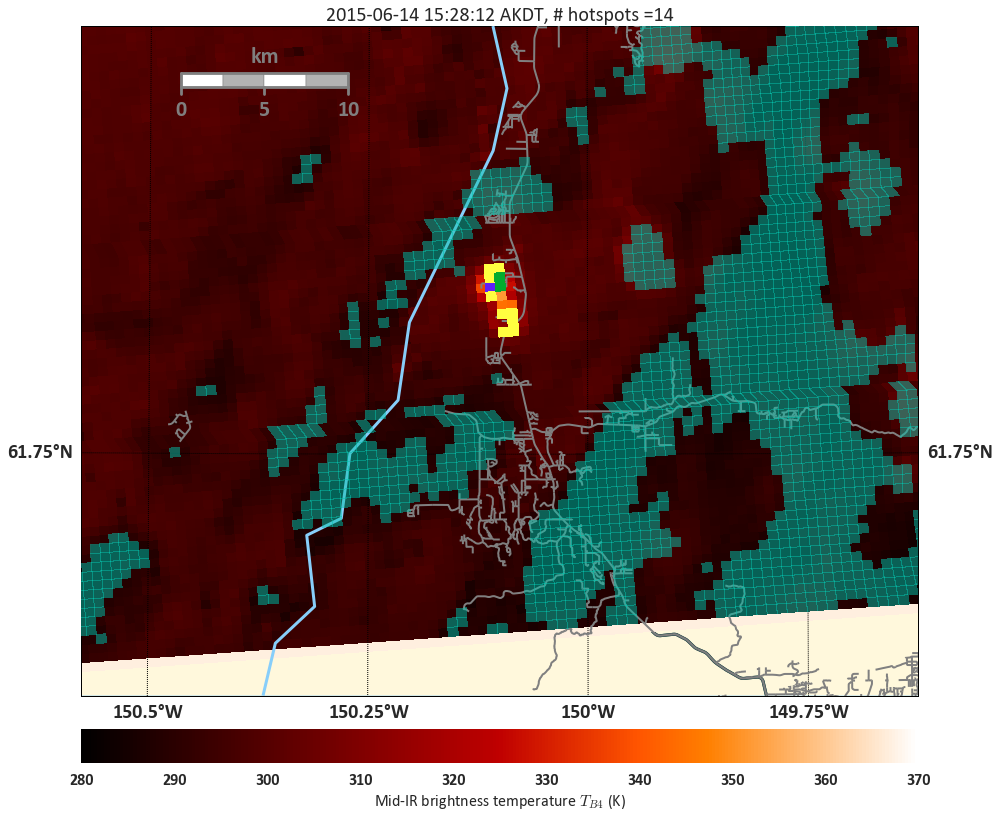

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_14_165_2325/sdr
0 51 1295 1396
False
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_15_166_1130/sdr
486 587 1432 1533
True


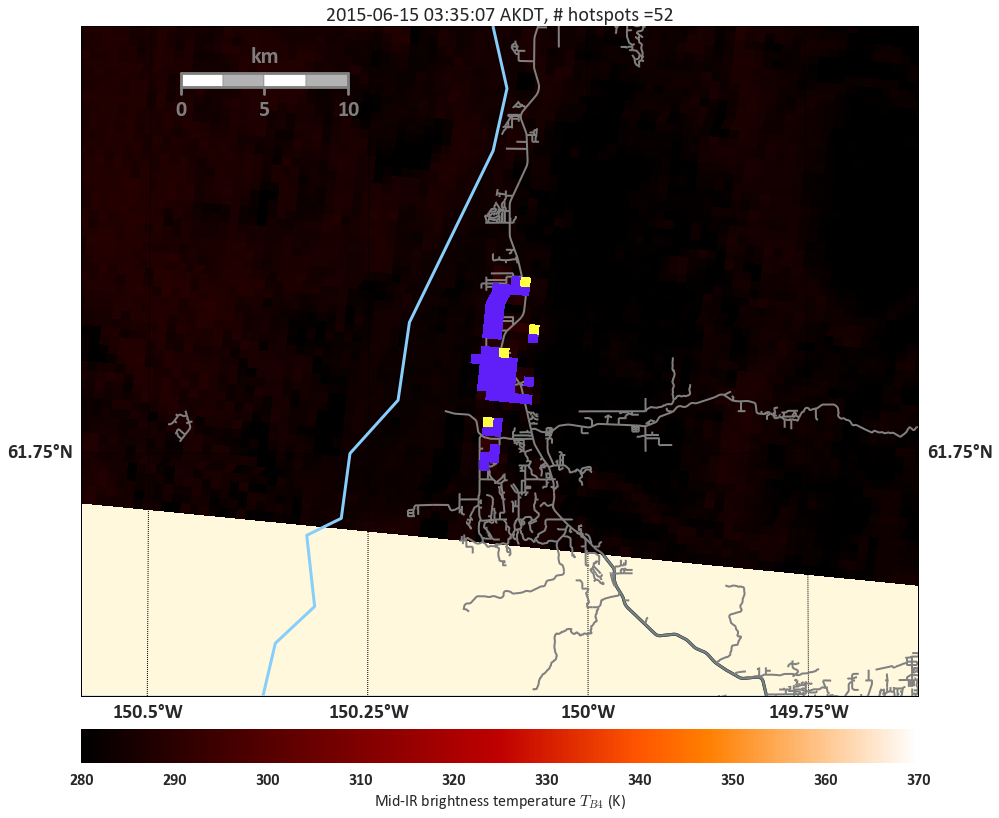

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_15_166_2125/sdr
1480 1536 4610 4711
False


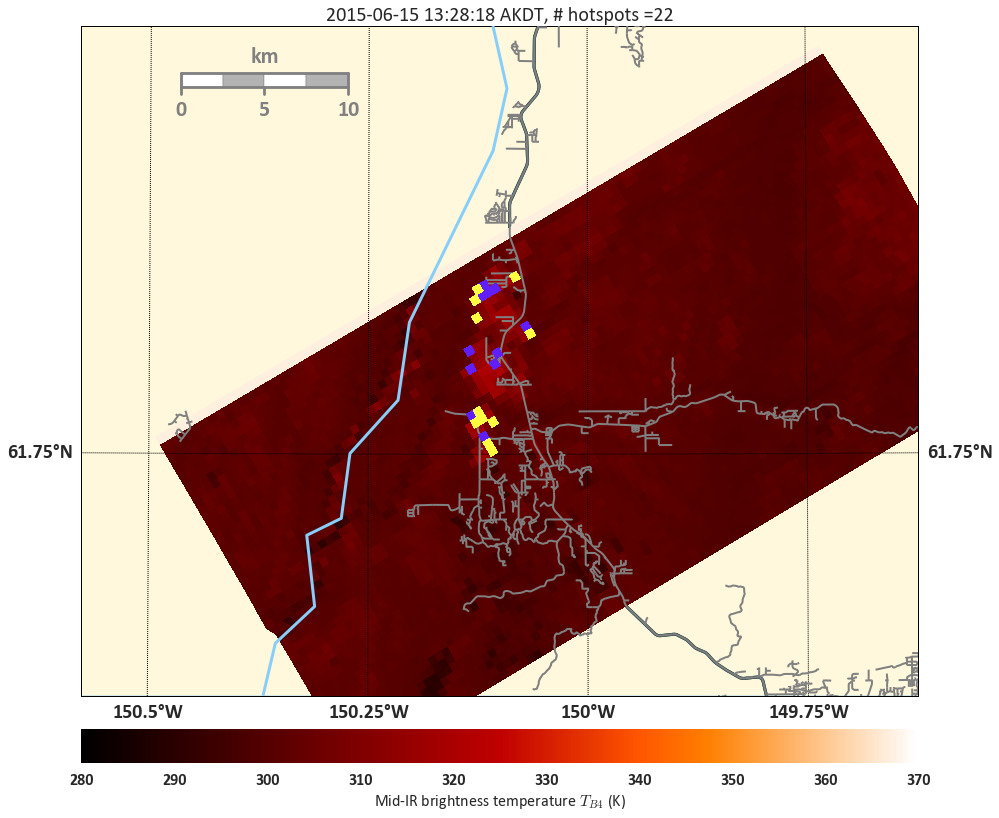

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_15_166_2125/sdr
0 52 4609 4710
False
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_15_166_2306/sdr
824 925 1818 1919
False


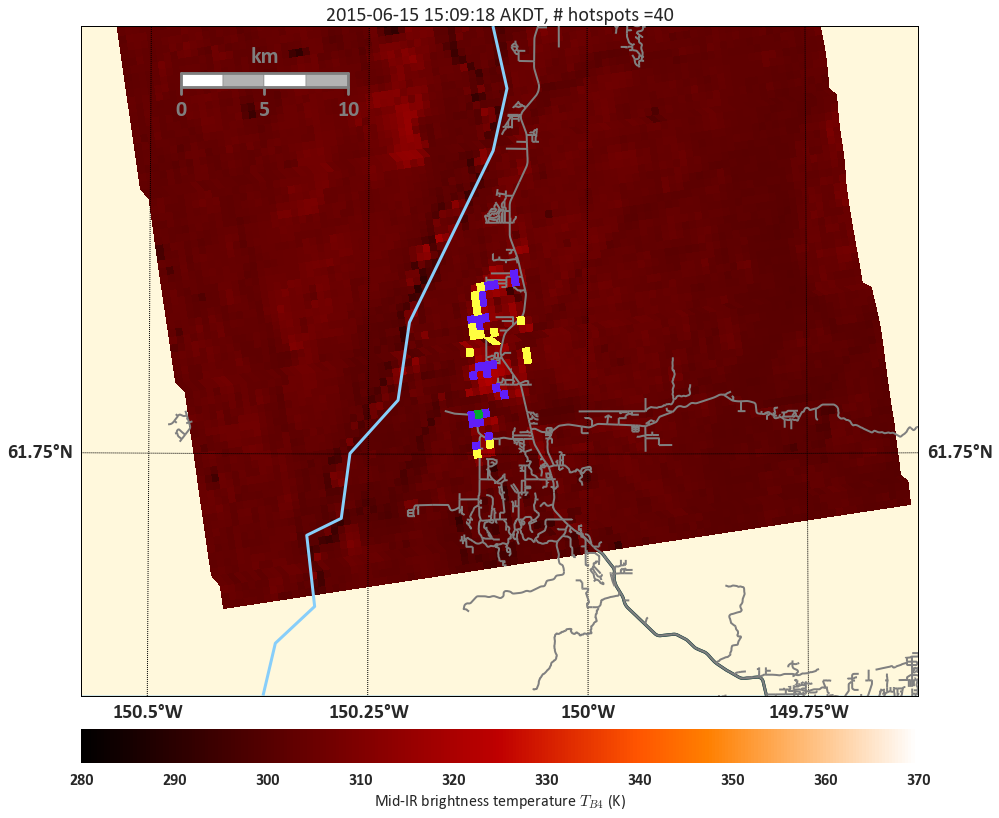

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_15_166_2306/sdr
0 51 1754 1855
False
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_16_167_1111/sdr
411 512 874 975
True


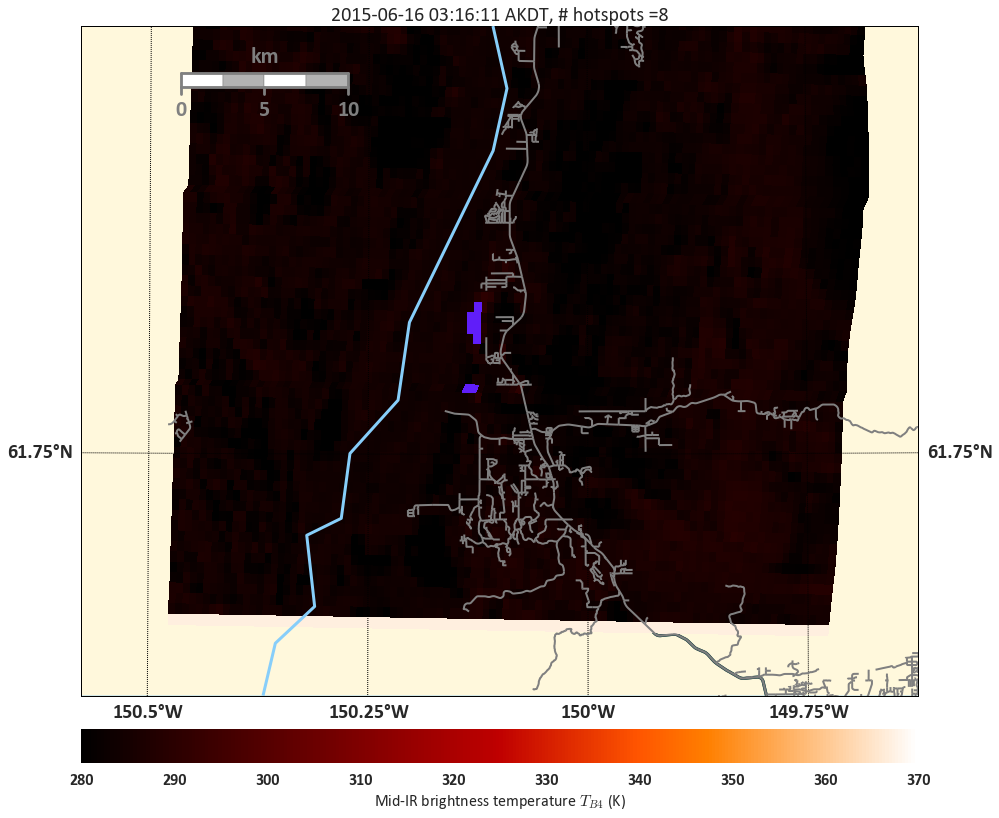

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_16_167_2107/sdr
191 292 5001 5102
False


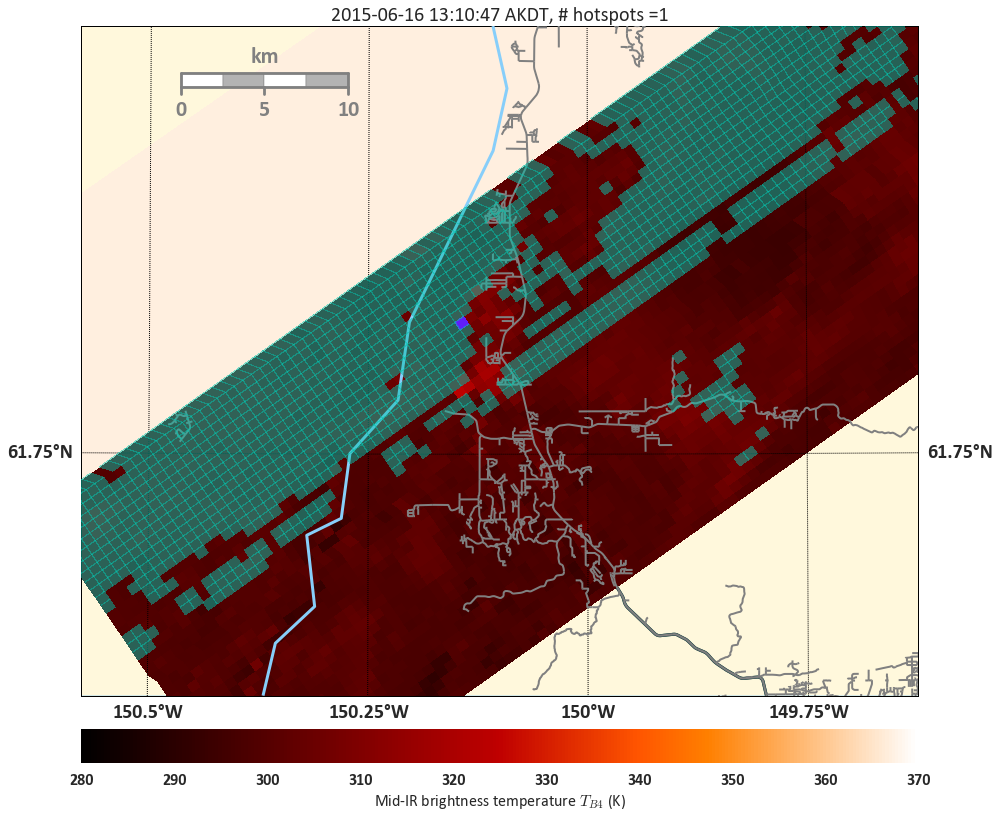

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_16_167_2247/sdr
826 927 2319 2420
False


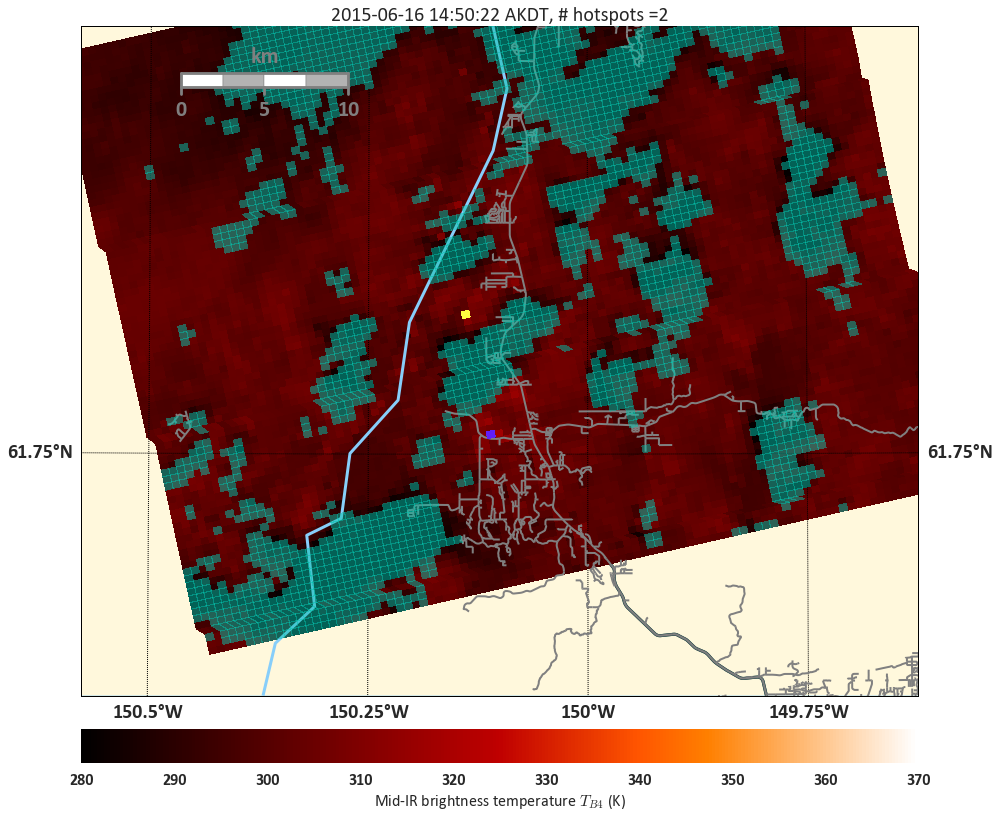

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_06_16_167_2247/sdr
0 51 2241 2342
False


In [73]:
SAVEFIG = False
for idx, granule in granuleDF.iterrows():
    print(granule['dir'])
    testscene01 = raster.VIIRSHDF5(os.path.join(granule['dir'], granule['SVI01']))
    testscene02 = raster.VIIRSHDF5(os.path.join(granule['dir'], granule['SVI02']))
    testscene04 = raster.VIIRSHDF5(os.path.join(granule['dir'], granule['SVI04']))
    testscene05 = raster.VIIRSHDF5(os.path.join(granule['dir'], granule['SVI05']))
    imin, imax, jmin, jmax = testscene04.crop(sample_lat, sample_lon, 50, 50)
    print(imin, imax, jmin, jmax)

    skips = vst.get_skips(testscene04, imin, imax, jmin, jmax)
    skiprows = vst.get_badrows(skips)

    pixq4 = testscene04.pixelquality[imin:imax, jmin:jmax]
    pixq5 = testscene05.pixelquality[imin:imax, jmin:jmax]

    datestamp = vt.getdatestamp_AKDT(testscene04)
    
    bandname = testscene04.bandname
    testdat = testscene04.dataobj['All_Data'][bandname]['BrightnessTemperature'][imin:imax, jmin:jmax]
    mult, add = testscene04.dataobj['All_Data'][bandname]['BrightnessTemperatureFactors'][:]
    plotraster4 = testdat*mult + add
    bandname = testscene05.bandname
    testdat = testscene05.dataobj['All_Data'][bandname]['BrightnessTemperature'][imin:imax, jmin:jmax]
    mult, add = testscene05.dataobj['All_Data'][bandname]['BrightnessTemperatureFactors'][:]
    plotraster5 = testdat*mult + add
    plotraster45 =  (plotraster4 - plotraster5) / (plotraster4 + plotraster5)
    bandname = testscene01.bandname
    testdat = testscene01.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
    mult, add = testscene01.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
    plotraster1 = testdat*mult + add
    bandname = testscene02.bandname
    testdat = testscene02.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
    mult, add = testscene02.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
    plotraster2 = testdat*mult + add

    nightscene = True
    solzenithangles = testscene04.geodata['SolarZenithAngle'][imin:imax, jmin:jmax]
    if np.all(solzenithangles <= 90.):
        nightscene = False
    print(nightscene)

    duplicatecondition = (skips == 1.)
    if nightscene:
        cloudcondition = np.logical_and(
            plotraster4 < 295, plotraster5 < 265)
        anomalouscondition, hotcondition, warmcondition = vif.getfireconditions_fromrasters(
            plotraster4, plotraster5, pixq4, pixq5, daytime=False)
    else:
        cloudcondition = np.logical_or(
            plotraster5 < 265, 
            np.logical_and(plotraster1 + plotraster2 > 0.9, plotraster5 < 295))
        cloudcondition = np.logical_or(
            cloudcondition,
            np.logical_and(plotraster1 + plotraster2 > 0.7, plotraster5 < 285))
        anomalouscondition, hotcondition, warmcondition = vif.getfireconditions_fromrasters(
            plotraster4, plotraster5, pixq4, pixq5, daytime=True)

    anomalouscondition = np.logical_and(anomalouscondition, ~duplicatecondition)
    anomalouscondition = np.delete(anomalouscondition, skiprows, 0)
    hotcondition = np.logical_and(hotcondition, ~duplicatecondition)
    hotcondition = np.delete(hotcondition, skiprows, 0)
    warmcondition = np.logical_and(warmcondition, ~duplicatecondition)
    warmcondition = np.delete(warmcondition, skiprows, 0)
    cloudcondition = np.delete(cloudcondition, skiprows, 0)

    plotraster4 = np.delete(plotraster4, skiprows, 0)
    plotraster4_masked = np.ma.masked_where(
        ~hotcondition, np.ones(plotraster4.shape))  
    plotraster_cool = np.ma.masked_where(
        ~warmcondition, np.ones(plotraster4.shape))
    plotraster45_anomalousmasked = np.ma.masked_where(
        ~anomalouscondition, np.ones(plotraster4.shape))
    cloudmask = np.ma.masked_where(
        ~cloudcondition, np.ones(plotraster4.shape))

    lons = np.delete(testscene04.lons[imin:imax, jmin:jmax], skiprows, 0)
    lats = np.delete(testscene04.lats[imin:imax, jmin:jmax], skiprows, 0)
    
    numdetections = anomalouscondition.sum() + hotcondition.sum() + warmcondition.sum()
    if numdetections == 0:
        continue
    plottitle = '{}, # hotspots ={}'.format(
        datestamp, numdetections)

    fig1 = plt.figure(1, figsize=(15, 15))
    ax1 = fig1.add_subplot(111)
    # mapbase
    mm = vt.generate_willowbase(zoom_in=True, resolution='i')
    xx, yy = mm(lons, lats)
    # data 
    dataplt = mm.pcolormesh(xx, yy, plotraster4, edgecolors='None', vmin=280, vmax=370, zorder=2)
    dataplot3 = mm.pcolormesh(xx, yy, plotraster_cool, edgecolors='None', cmap=cmap2, vmin=0, vmax=1, zorder=5)
    dataplot2 = mm.pcolormesh(xx, yy, plotraster4_masked, edgecolors='None', cmap=cmap1, vmin=0, vmax=1, zorder=5)
    dataplot4 = mm.pcolormesh(xx, yy, plotraster45_anomalousmasked, cmap=cmap3, vmin=0, vmax=1, zorder=5)
    cloudplot = mm.pcolormesh(xx, yy, cloudmask, cmap=cmap4, alpha=0.5, vmin=0, vmax=1, zorder=5)
    # scale 
    mm.drawmapscale(-150.37, 61.95, -150.1, 61.85, 10, 
                    barstyle="fancy", fontsize=22, zorder=6,
                    fontcolor='0.5', fillcolor2='0.7')

    cbar = mm.colorbar(dataplt, location='bottom', pad="5%")
    cbarlabel = "Mid-IR brightness temperature $T_{B4}$ (K)"
    cbar.set_label(cbarlabel)
    mm.readshapefile(
        sideroads, 
        'sideroads', 
        color="grey", linewidth=2, zorder=3)
    ax1.set_title(plottitle)
    if SAVEFIG:
        datestamp = vt.getdatestamp_AKDT(testscene04, spaces=False)
        filename = 'Sockeye_hotspot_map_{}.png'.format(datestamp)
        outpath = os.path.join(outdir, filename)
        fig1.savefig(outpath, dpi=200, bbox_inches='tight')
    plt.show()



### Plots -- individuals

In [48]:
reload(vif)

<module 'viirsifire' from '../firedetection/viirsifire.py'>

In [75]:
testgranule = granuleDF.loc[u'20150614_2147138']
testpath01 = os.path.join(testgranule['dir'], testgranule['SVI01'])
testpath02 = os.path.join(testgranule['dir'], testgranule['SVI02'])
testpath03 = os.path.join(testgranule['dir'], testgranule['SVI03'])
testscene04 = raster.VIIRSHDF5(os.path.join(testgranule['dir'], testgranule['SVI04']))
testscene05 = raster.VIIRSHDF5(os.path.join(testgranule['dir'], testgranule['SVI05']))

In [77]:
testscene04.meta

{u'Data_Product': {u'AggregateBeginningDate': u'20150614',
  u'AggregateBeginningGranuleID': u'NPP001149904333',
  u'AggregateBeginningOrbitNumber': u'18806',
  u'AggregateBeginningTime': u'214713.824127Z',
  u'AggregateEndingDate': u'20150614',
  u'AggregateEndingGranuleID': u'NPP001149904333',
  u'AggregateEndingOrbitNumber': u'18806',
  u'AggregateEndingTime': u'214837.999747Z',
  u'Instrument_Short_Name': u'VIIRS',
  u'N_Collection_Short_Name': u'VIIRS-I4-SDR',
  u'N_Dataset_Type_Tag': u'SDR',
  u'N_Processing_Domain': u'OPS'},
 u'Distributor': u'cspp',
 u'Mission_Name': u'NPP',
 u'N_Dataset_Source': u'all-',
 u'N_GEO_Ref': u'GITCO_npp_d20150614_t2147138_e2148379_b18806_c20150614220958553149_cspp_dev.h5',
 u'N_HDF_Creation_Date': u'20150614',
 u'N_HDF_Creation_Time': u'221000.925427Z',
 u'Number_of_Data_Products': u'1',
 u'Platform_Short_Name': u'NPP'}

In [76]:
#imin, imax, jmin, jmax = testscene04.crop(sample_lat, sample_lon, 500, 400)
imin, imax, jmin, jmax = testscene04.crop(sample_lat, sample_lon, 50, 50)
print(
    imin, imax, jmin, jmax, 
    testscene04.lats[testscene04.getnearestidx(sample_lat, sample_lon)], 
    testscene04.lons[testscene04.getnearestidx(sample_lat, sample_lon)]
)
print(sample_lat, sample_lon)
datestamp = vt.getdatestamp_AKDT(testscene04)
pixelq4 = testscene04.pixelquality[imin:imax, jmin:jmax]
pixelq5 = testscene05.pixelquality[imin:imax, jmin:jmax]
# find row indices where no data present
excluderows = np.where((pixelq4[:, 0] == 2) | (pixelq4[:, -1] == 2) )


1280 1381 4152 4253 61.844 -150.086
61.84486 -150.08544


In [78]:
nightscene = True
zenithangles = testscene04.geodata['SolarZenithAngle'][imin:imax, jmin:jmax]
if np.all(zenithangles <= 90.):
    nightscene = False
elif (np.any(zenithangles > 90.) & np.any(zenithangles <= 90.)):
    print("WARNING: mixed scene with zenith angles above and below 90°.")
print(nightscene)

False


In [79]:
print(testscene04.ascending_node)

True


In [80]:
imin, imax, jmin, jmax

(1280, 1381, 4152, 4253)

In [81]:
rasterlist = []
excluderows

(array([], dtype=int64),)

In [82]:
skips = vst.get_skips(testscene04, imin, imax, jmin, jmax)
skiprows = vst.get_badrows(skips)
skiprows

array([29, 30, 31, 32, 33, 61, 62, 63, 64, 65, 94, 95, 96, 97])

In [63]:
print(datestamp)

2015-06-14 13:47:13 AKDT


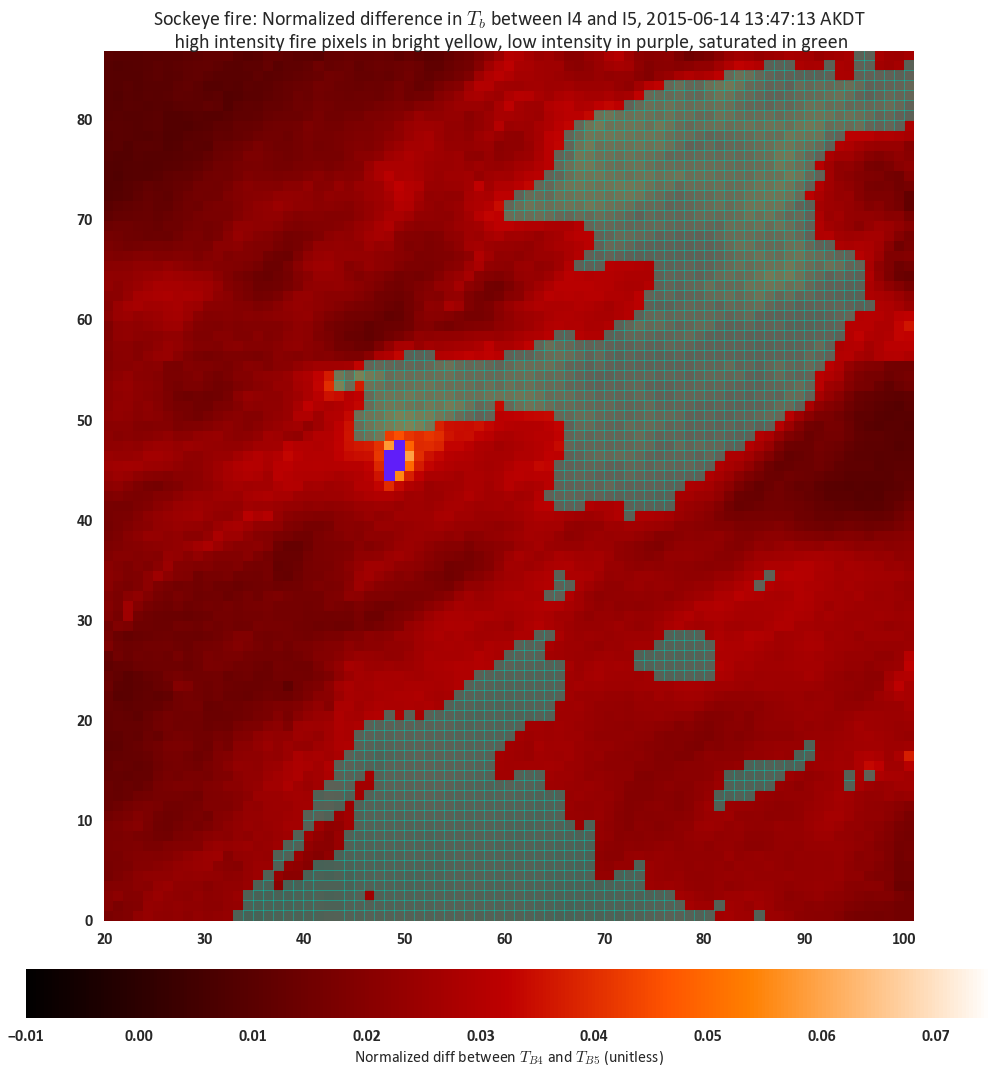

In [95]:
# sith plot: masked over normalized difference or TB4
MASK = True
PLOTB4 = False

scene = testscene04
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['BrightnessTemperature'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['BrightnessTemperatureFactors'][:]
plotraster4 = testdat*mult + add
plotraster4 = np.delete(plotraster4, skiprows, 0)

scene = scene = testscene05
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['BrightnessTemperature'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['BrightnessTemperatureFactors'][:]
plotraster5 = testdat*mult + add
plotraster5 = np.delete(plotraster5, skiprows, 0)

plotraster45 =  (plotraster4 - plotraster5) / (plotraster4 + plotraster5)
pixq4 = np.delete(pixelq4, skiprows, 0)
pixq5 = np.delete(pixelq5, skiprows, 0)

scene = raster.VIIRSHDF5(testpath01)
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
plotraster1 = testdat*mult + add
plotraster1 = np.delete(plotraster1, skiprows, 0)

scene = raster.VIIRSHDF5(testpath02)
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
plotraster2 = testdat*mult + add
plotraster2 = np.delete(plotraster2, skiprows, 0)

if PLOTB4:
    titlestr1 = "Sockeye fire: $T_b$ from band I4"
else:
    titlestr1 = "Sockeye fire: Normalized difference in $T_b$ between I4 and I5"

if MASK:
#    duplicatecondition = (skips == 1.)

    if nightscene:
        anomalouscondition = np.logical_or(
            np.logical_and(pixq4 == 193, plotraster4 < 360),
            np.logical_and(pixq5 == 0, plotraster4 == 367.))
        plotraster45_anomalousmasked = np.ma.masked_where(
            ~anomalouscondition, np.ones(plotraster45.shape))
        cloudcondition = (plotraster5 < 265.)
        hotcondition = (plotraster45 >= 0.05)
        hotcondition = np.logical_and(~cloudcondition, hotcondition)
        warmcondition = np.logical_and(~hotcondition, plotraster45 >= 0.015)
        warmcondition = np.logical_and(plotraster4 > 290, warmcondition)
        warmcondition = np.logical_and(~cloudcondition, warmcondition)
        cloudcondition = np.logical_and(
            plotraster4 < 295, plotraster5 < 265
        )

    else:
        # it's day 
        anomalouscondition = np.logical_or(
            np.logical_and(pixq4 == 193, plotraster4 < 360),
            np.logical_and(pixq5 == 0, plotraster4 == 367.))
#        anomalouscondition = np.logical_and(
#            ~duplicatecondition, anomalouscondition)
        
        hotcondition = (plotraster45 >= 0.05)
        hotcondition = np.logical_and(
            np.logical_and(hotcondition, plotraster4 > 320), plotraster5 > 290)
        hotcondition = np.logical_and(
            hotcondition, ~anomalouscondition)
#        hotcondition = np.logical_and(
#            ~duplicatecondition, hotcondition)
        

        warmcondition = np.logical_or(
            plotraster45 >= 0.02, np.logical_and(
                plotraster45 >= 0.015, plotraster5 >= 312))
        warmcondition = np.logical_and(
            warmcondition, plotraster4 > 320)
        warmcondition = np.logical_and(
            warmcondition, plotraster5 > 270)
        warmcondition = np.logical_and(
            warmcondition, ~anomalouscondition)
        warmcondition = np.logical_and(
            warmcondition, ~hotcondition)
#        warmcondition = np.logical_and(
#            ~duplicatecondition, warmcondition)

        cloudcondition = np.logical_or(
            plotraster5 < 265, 
            np.logical_and(plotraster1 + plotraster2 > 0.9, plotraster5 < 295))
        cloudcondition = np.logical_or(
            cloudcondition,
            np.logical_and(plotraster1 + plotraster2 > 0.7, plotraster5 < 285),)
    cloudmask = np.ma.masked_where(
        ~cloudcondition, np.ones(plotraster5.shape))
    plotraster45_masked = np.ma.masked_where(
        ~hotcondition, np.ones(plotraster45.shape))
    plotraster_cool = np.ma.masked_where(
        ~warmcondition, np.ones(plotraster45.shape))
    plotraster45_anomalousmasked = np.ma.masked_where(
        ~anomalouscondition, np.ones(plotraster45.shape))

    cmap1 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'canary yellow']))
    cmap2 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'purplish blue']))
    cmap3 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'kelly green']))
    cmap4 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'turquoise']))
    
    plottitle = '{}, {}\n high intensity fire pixels in bright yellow, low intensity in purple, saturated in green'.format(
        titlestr1, datestamp)
else:
    plottitle = '{}, {}'.format(titlestr1, datestamp)

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
#ax1.set_xticklabels([])
#ax1.set_yticklabels([])
ax1.grid(False)

if PLOTB4:
    dataplot = ax1.pcolormesh(np.fliplr(plotraster4), vmin=280, vmax=370) 
    cbarlabel = "$T_B$ in $K$"
else:
    dataplot = ax1.pcolormesh(np.fliplr(plotraster45), vmin=-.01, vmax=0.075)   
    cbarlabel = "Normalized diff between $T_{B4}$ and $T_{B5}$ (unitless)"


if MASK:
    dataplot3 = ax1.pcolormesh(np.fliplr(plotraster_cool), cmap=cmap2, vmin=0, vmax=1)
    dataplot2 = ax1.pcolormesh(np.fliplr(plotraster45_masked), cmap=cmap1, vmin=0, vmax=1)
    dataplot4 = ax1.pcolormesh(np.fliplr(plotraster45_anomalousmasked), cmap=cmap3, vmin=0, vmax=1)
    cloudplot = ax1.pcolormesh(np.fliplr(cloudmask), cmap=cmap4, alpha=0.5, vmin=0, vmax=1)

ax1.set_title(plottitle)
ax1.set_aspect('equal')
ax1.set_xlim(20, plotraster45.shape[1])
ax1.set_ylim(0, plotraster45.shape[0])
plt.tight_layout()

cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label(cbarlabel)

plt.show()



In [103]:
anomalouscondition.sum() + hotcondition.sum() + warmcondition.sum()

6

In [56]:
fig1.savefig("/Users/cwaigl/Desktop/testfires_after.png", dpi=300)


In [63]:
fn = 'viirscloudmask02NormDiff.png'
fig1.savefig(os.path.join(outdir, fn), bb_inches='tight', dpi=200)

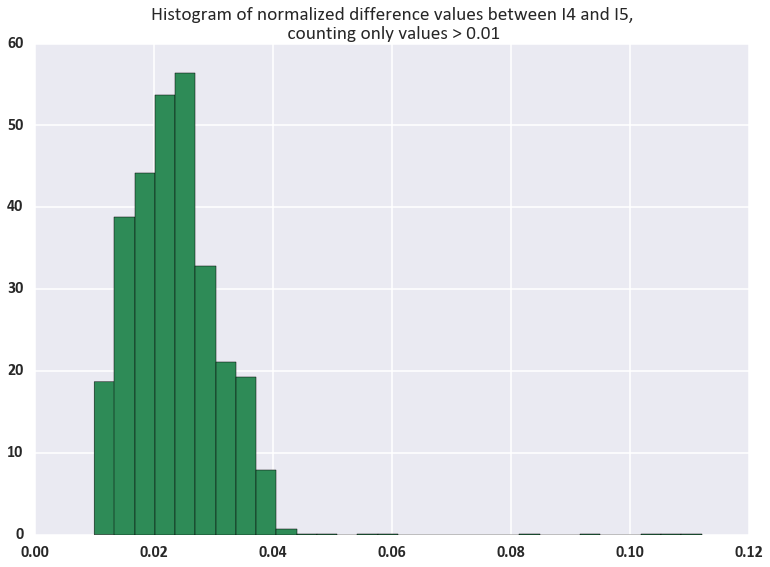

In [106]:
normdiffs = plotraster45.flatten()
values = normdiffs[normdiffs>0.01]
n, bins, patches = plt.hist(values, 30, normed=1, facecolor='seagreen') 
plt.title("Histogram of normalized difference values between I4 and I5,\n counting only values > 0.01")

In [27]:
testgranule = granuleDF.loc[u'20150614_2147138']
testscene04 = raster.VIIRSHDF5(os.path.join(testgranule['dir'], testgranule['SVI04']))
testscene05 = raster.VIIRSHDF5(os.path.join(testgranule['dir'], testgranule['SVI05']))
i4sc = testscene04
i5sc = testscene05
imin, imax, jmin, jmax = i4sc.crop(sample_lat, sample_lon, 50, 50)


In [28]:
ascendingnode = True
middlelatdelta = i4sc.lats[-1, 3200] - i4sc.lats[0, 3200]
if middlelatdelta < 0:
    ascendingnode = False 
i4sc.ascendingnode = ascendingnode
skips = vst.get_skips(i4sc, imin=imin, imax=imax, jmin=jmin, jmax=jmax)

lons = i4sc.lons[imin:imax, jmin:jmax]
lats = i4sc.lats[imin:imax, jmin:jmax]

mult, add = i4sc.I4['BrightnessTemperatureFactors'][:]
i4tb = i4sc.I4['BrightnessTemperature'][imin:imax, jmin:jmax]
i4tb = i4tb * mult + add
mult, add = i5sc.I5['BrightnessTemperatureFactors'][:]
i5tb = i5sc.I5['BrightnessTemperature'][imin:imax, jmin:jmax]
i5tb = i5tb * mult + add
pixq4 = i4sc.pixelquality[imin:imax, jmin:jmax]
pixq5 = i5sc.pixelquality[imin:imax, jmin:jmax]

nightscene = True
zenithangles = i4sc.geodata['SolarZenithAngle'][imin:imax, jmin:jmax]
if np.all(zenithangles <= 90.):
    nightscene = False
elif (np.any(zenithangles > 90.) & np.any(zenithangles <= 90.)):
    print("WARNING: mixed scene with zenith angles above and below 90°.")

i45 =  (i4tb - i5tb) / (i4tb + i5tb)

datestamp = vt.getdatestamp_AKDT(i4sc)

# conditions
duplicatecondition = (skips == 1.)

if nightscene:
    print("Night scene")
    anomalouscondition = np.logical_or(
        np.logical_and(pixq4 == 193, i4tb < 360),
        np.logical_and(pixq5 == 0, i4tb == 367.))
    anomalouscondition = np.logical_and(
        ~duplicatecondition, anomalouscondition)
    cloudcondition = (i5tb < 265.)
    hotcondition = (i45 >= 0.05)
    hotcondition = np.logical_and(~cloudcondition, hotcondition)
    hotcondition = np.logical_and(
        ~duplicatecondition, hotcondition)
    warmcondition = np.logical_and(~hotcondition, i45 >= 0.015)
    warmcondition = np.logical_and(i4tb > 290, warmcondition)
    warmcondition = np.logical_and(~cloudcondition, warmcondition)
    warmcondition = np.logical_and(
        ~duplicatecondition, warmcondition)
else:
# it's day 
    print("Day scene")
    anomalouscondition = np.logical_or(
        np.logical_and(pixq4 == 193, i4tb < 360),
        np.logical_and(pixq5 == 0, i4tb == 367.))
    anomalouscondition = np.logical_and(
        ~duplicatecondition, anomalouscondition)

    hotcondition = (i45 >= 0.05)
    hotcondition = np.logical_and(
        np.logical_and(hotcondition, i4tb > 320), i5tb > 290)
    hotcondition = np.logical_or(
        hotcondition, anomalouscondition)
    hotcondition = np.logical_and(
        ~duplicatecondition, hotcondition)

    warmcondition = np.logical_or(
        i45 >= 0.02, np.logical_and(
            i45 >= 0.015, i5tb >= 308))
    warmcondition = np.logical_and(
        warmcondition, i4tb > 320)
    warmcondition = np.logical_and(
        ~duplicatecondition, warmcondition)

print(np.where(warmcondition))
print(np.where(hotcondition))

Day scene
(array([49, 50, 50, 51, 51, 52]), array([52, 51, 52, 51, 52, 51]))
(array([], dtype=int64), array([], dtype=int64))


In [29]:
i4sc.meta

{u'Data_Product': {u'AggregateBeginningDate': u'20150614',
  u'AggregateBeginningGranuleID': u'NPP001149904333',
  u'AggregateBeginningOrbitNumber': u'18806',
  u'AggregateBeginningTime': u'214713.824127Z',
  u'AggregateEndingDate': u'20150614',
  u'AggregateEndingGranuleID': u'NPP001149904333',
  u'AggregateEndingOrbitNumber': u'18806',
  u'AggregateEndingTime': u'214837.999747Z',
  u'Instrument_Short_Name': u'VIIRS',
  u'N_Collection_Short_Name': u'VIIRS-I4-SDR',
  u'N_Dataset_Type_Tag': u'SDR',
  u'N_Processing_Domain': u'OPS'},
 u'Distributor': u'cspp',
 u'Mission_Name': u'NPP',
 u'N_Dataset_Source': u'all-',
 u'N_GEO_Ref': u'GITCO_npp_d20150614_t2147138_e2148379_b18806_c20150614220958553149_cspp_dev.h5',
 u'N_HDF_Creation_Date': u'20150614',
 u'N_HDF_Creation_Time': u'221000.925427Z',
 u'Number_of_Data_Products': u'1',
 u'Platform_Short_Name': u'NPP'}

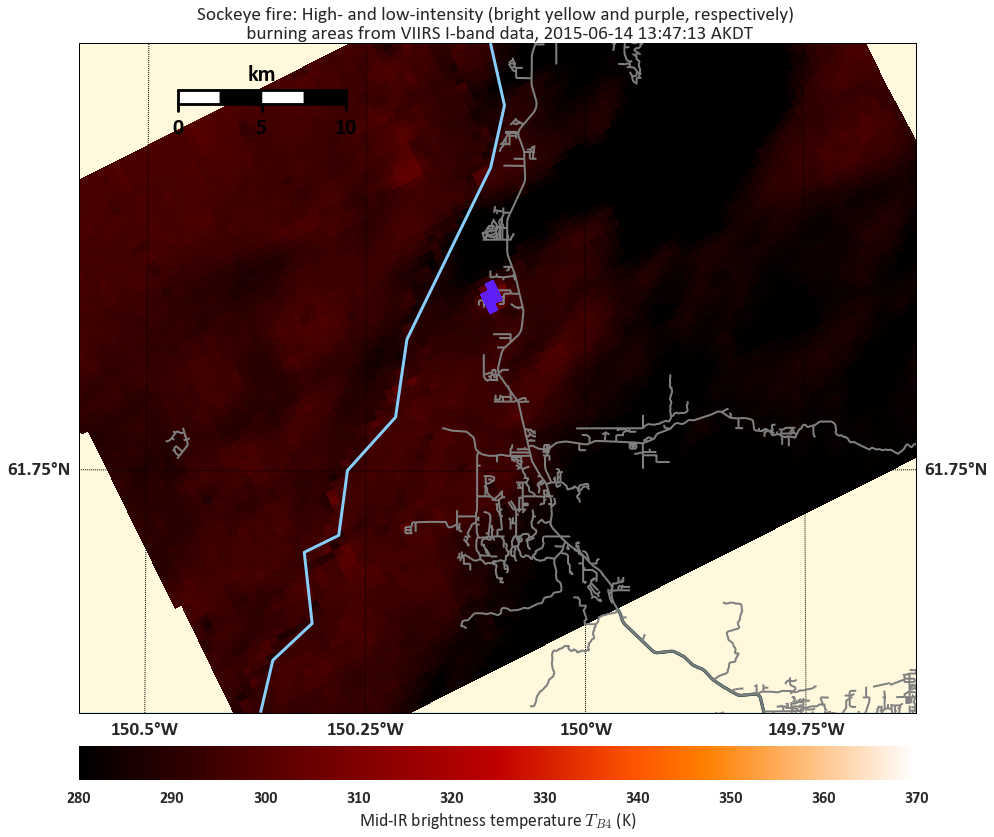

In [30]:
SAVEFIG = False
sns.set_context("poster")

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.set_xticklabels([])
ax1.grid(False) 

pixq4 = i4sc.pixelquality[imin:imax, jmin:jmax]
pixq5 = i5sc.pixelquality[imin:imax, jmin:jmax]
# find row indices where no data present
excluderows = np.where((pixq4[:, 0] == 2) | (pixq4[:, -1] == 2) )
pixq4 = np.delete(pixq4, excluderows, 0)
pixq5 = np.delete(pixq5, excluderows, 0)
mult, add = i4sc.I4['BrightnessTemperatureFactors'][:]
i4tb = i4sc.I4['BrightnessTemperature'][imin:imax, jmin:jmax]
i4tb_scaled = i4tb * mult + add
plotraster4 = np.delete(i4tb_scaled, excluderows, 0)
mult, add = i5sc.I5['BrightnessTemperatureFactors'][:]
i5tb = i5sc.I5['BrightnessTemperature'][imin:imax, jmin:jmax]
i5tb_scaled = i5tb * mult + add
plotraster5 = np.delete(i5tb_scaled, excluderows, 0)

ascendingnode = True
middlelatdelta = i4sc.lats[-1, 3200] - i4sc.lats[0, 3200]
if middlelatdelta < 0:
    ascendingnode = False 
i4sc.ascendingnode = ascendingnode
skips = vst.get_skips(i4sc, imin=imin, imax=imax, jmin=jmin, jmax=jmax)
skips = np.delete(skips, excluderows, 0)

nightscene = True
zenithangles = i4sc.geodata['SolarZenithAngle'][imin:imax, jmin:jmax]
if np.all(zenithangles <= 90.):
    nightscene = False
elif (np.any(zenithangles > 90.) & np.any(zenithangles <= 90.)):
    print("WARNING: mixed scene with zenith angles above and below 90°.")

plotraster45 =  (plotraster4 - plotraster5) / (plotraster4 + plotraster5)
cmap1 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['canary yellow']))
cmap2 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['purplish blue']))
cmap3 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['kelly green']))

lons = i4sc.lons[imin:imax, jmin:jmax]
lats = i4sc.lats[imin:imax, jmin:jmax]
datestamp = vt.getdatestamp_AKDT(i4sc)

duplicatecondition = (skips == 1.)
if nightscene:
    anomalouscondition = np.logical_or(
        np.logical_and(pixq4 == 193, plotraster4 < 360),
        np.logical_and(pixq5 == 0, plotraster4 == 367.))
    anomalouscondition = np.logical_and(
        ~duplicatecondition, anomalouscondition)
    plotraster45_anomalousmasked = np.ma.masked_where(
        ~anomalouscondition, np.ones(plotraster45.shape))
    cloudcondition = (plotraster5 < 265.)
    hotcondition = (plotraster45 >= 0.05)
    hotcondition = np.logical_and(~cloudcondition, hotcondition)
    hotcondition = np.logical_and(
        ~duplicatecondition, hotcondition)
    warmcondition = np.logical_and(~hotcondition, plotraster45 >= 0.015)
    warmcondition = np.logical_and(plotraster4 > 290, warmcondition)
    warmcondition = np.logical_and(~cloudcondition, warmcondition)
    warmcondition = np.logical_and(
        ~duplicatecondition, warmcondition)

else:
    # it's day 
    anomalouscondition = np.logical_or(
        np.logical_and(pixq4 == 193, plotraster4 < 360),
        np.logical_and(pixq5 == 0, plotraster4 == 367.))
    anomalouscondition = np.logical_and(
        ~duplicatecondition, anomalouscondition)

    hotcondition = (plotraster45 >= 0.05)
    hotcondition = np.logical_and(
        np.logical_and(hotcondition, plotraster4 > 320), plotraster5 > 290)
    hotcondition = np.logical_or(
        hotcondition, anomalouscondition)
    hotcondition = np.logical_and(
        ~duplicatecondition, hotcondition)

    warmcondition = np.logical_or(
        plotraster45 >= 0.02, np.logical_and(
            plotraster45 >= 0.015, plotraster5>=312))
    warmcondition = np.logical_and(
        warmcondition, plotraster4 > 320)
    warmcondition = np.logical_and(
        ~duplicatecondition, warmcondition)

plotraster45_masked = np.ma.masked_where(
    ~hotcondition, np.ones(plotraster45.shape))
plotraster_cool = np.ma.masked_where(
    ~warmcondition, np.ones(plotraster45.shape))
plotraster45_anomalousmasked = np.ma.masked_where(
    ~anomalouscondition, np.ones(plotraster45.shape))


# map plot
fig1 = plt.figure(1, figsize=(20, 15))
ax1 = fig1.add_subplot(111)
# mapbase
mm = vt.generate_willowbase(zoom_in=True, resolution='i')
xx, yy = mm(np.delete(lons, excluderows, 0), np.delete(lats, excluderows, 0))
# data 
dataplt = mm.pcolormesh(xx, yy, plotraster4, edgecolors='None',vmin=280, vmax=370, zorder=2)
dataplot3 = mm.pcolormesh(xx, yy, plotraster_cool, edgecolors='None', cmap=cmap2, vmin=0, vmax=1, zorder=5)
dataplot2 = mm.pcolormesh(xx, yy, plotraster45_masked, edgecolors='None', cmap=cmap1, vmin=0, vmax=1, zorder=5)
dataplot4 = mm.pcolormesh(xx, yy, plotraster45_anomalousmasked, cmap=cmap3, vmin=0, vmax=1, zorder=5)
# scale 
mm.drawmapscale(-150.37, 61.95, -150.1, 61.85, 10, barstyle="fancy", fontsize=22, zorder=3)

cbar = mm.colorbar(dataplt, location='bottom', pad="5%")
cbarlabel = "Mid-IR brightness temperature $T_{B4}$ (K)"
cbar.set_label(cbarlabel)
mm.readshapefile(
    sideroads, 
    'sideroads', 
    color="grey", linewidth=2, zorder=3)

ax1.set_title(
    'Sockeye fire: High- and low-intensity (bright yellow and purple, respectively) \n burning areas from VIIRS I-band data, {}'.format(datestamp))
if SAVEFIG:
    datestamp = vt.getdatestamp_AKDT(i4sc, spaces=False)
    filename = 'Sockeye_hotspot_map_{}.png'.format(datestamp)
    outpath = os.path.join(productdir, filename)
    fig1.savefig(outpath, dpi=200, bbox_inches='tight')
plt.show()



In [96]:
print(sum(sum(hotcondition)), sum(sum(warmcondition)), sum(sum(anomalouscondition)))
print(np.where(warmcondition))
print(np.where(hotcondition))

0 6 0
(array([44, 45, 45, 46, 46, 47]), array([52, 51, 52, 51, 52, 51]))
(array([], dtype=int64), array([], dtype=int64))
